# Week3授業課題 信用情報を分析しよう   

この課題の目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

## 信用情報

Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

## 【問題1】 コンペティション内容の把握

以下の観点に気をつけて、どのようなコンペティションなのかレポートしてください。

- このコンペティションでは何を予測する？目的変数は？
- 企業がこのコンペティションを開催することで得られるメリットは？
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？

- このコンペティションでは何を予測する？目的変数は？   
顧客の返済能力を予測する。目的変数は「TARGET」。   
1：顧客が最初のY回の分割払いの内に少なくとも一回でX日以上延滞していた場合(支払い困難な顧客)   
0：その他の顧客(支払いできている顧客)   
<br>
- 企業がこのコンペティションを開催することで得られるメリットは？   
信用履歴が不十分の人々のせいで、ローンの取得に苦しんでいる人々が存在する。顧客の返済能力を予測することで、そういった人々が確実にローンの取得をできるようにする。   
<br>
- データセットを見る前の段階で考えられる予測結果に影響してきそうなことは？   
顧客の収入状況や、これまでのローンの取得履歴、また返済しているかどうか等の顧客の金融状況、また、顧客がどういった生活をしているか(仕事、住まい等)の生活状況が影響してくると思われる。

## データセットの準備
データセットはKaggleのページからapplication.csvをダウンロードしてください。

[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)

### カーネル

カーネルは自由に見て活用してください。

＜参考カーネル＞

[Home Credit Default Risk Extensive EDA | Kaggle](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)

[HomeCreditRisk: Extensive EDA + Baseline \[0.772\] | Kaggle](https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772)

[HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle](https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp)

この他にも、カーネルの一覧ページから探してください。

## 【問題2】 データの概観

データの概観を把握してください。

（例）

- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスごとのデータ数をグラフに出す

コードと表・グラフだけではなく、結果に対する説明や考察も行ってください。



In [39]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#DataFrameで表示できる行列の最大数を設定
pd.set_option('display.max_columns', 122)
pd.set_option('display.max_rows', 100)

In [40]:
#データセットの読み込み
df = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [41]:
#データの表示
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [42]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


説明変数は、浮動小数点型が65、整数型が39、文字型が16の合計120存在する。目的変数「TARGET」は整数型、その他にIDが含まれている。
各説明変数は307511行分存在する。

In [43]:
#欠損値の数を数え、降順にソート
total = df.isnull().sum().sort_values(ascending=False)

#欠損値の割合を計算し、降順にソート
missing_ratio = ((df.isnull().sum() / df.isnull().count()) * 100).sort_values(ascending=False)

#DataFrameを作成
df_na = pd.concat([total, missing_ratio], axis=1, keys=['Total', 'missing_ratio'])
df_na.head()

Total  missing_ratio
COMMONAREA_MEDI           214865      69.872297
COMMONAREA_AVG            214865      69.872297
COMMONAREA_MODE           214865      69.872297
NONLIVINGAPARTMENTS_MODE  213514      69.432963
NONLIVINGAPARTMENTS_MEDI  213514      69.432963

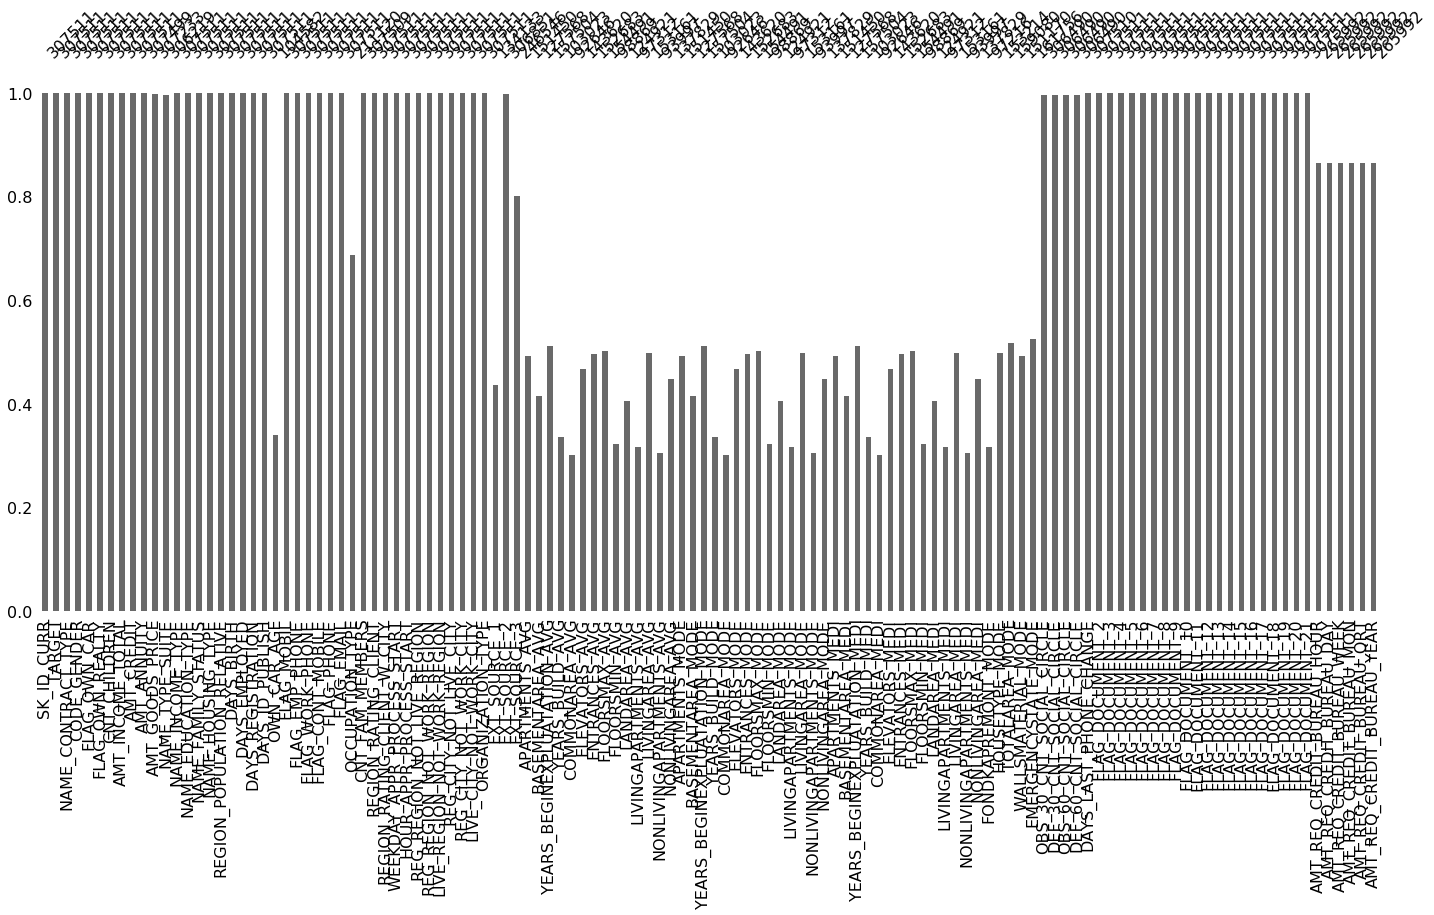

In [44]:
#非欠損値の数の棒グラフを表示
msno.bar(df);

欠損値は67の説明変数に含まれている。

In [45]:
df.describe(include='all')

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE  \
count   3.075110e+05  307499.000000     3.072330e+05          306219   
unique           NaN            NaN              NaN               7   
top              NaN            NaN              NaN   Unaccompanied   
freq             NaN            NaN              NaN          248526   
mean    5.990260e+05   27108.573909     5.383962e+05             NaN   
std     4.024908e+05   14493.737315     3.694465e+05             NaN   
min     4.500000e+04    1615.500000     4.050000e+04             NaN   
25%     2.700000e+05   16524.000000     2.385000e+05             NaN   
50%     5.135310e+05   24903.000000     4.500000e+05             NaN   
75%     8.086500e+05   34596.000000     6.795000e+05             NaN   
max     4.050000e+06  258025.500000     4.050000e+06             NaN   

       NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
count            307511                         307511             307511   
unique                8                              5                  6   
top             Working  Secondary / secondary special            Married   
freq             158774                         218391             196432   
mean                NaN                            NaN                NaN   
std                 NaN                            NaN                NaN   
min                 NaN                            NaN                NaN   
25%                 NaN                            NaN                NaN   
50%                 NaN                            NaN                NaN   
75%                 NaN                            NaN                NaN   
max                 NaN                            NaN                NaN   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count              307511               307511.000000  307511.000000   
unique                  6                         NaN            NaN   
top     House / apartment                         NaN            NaN   
freq               272868                         NaN            NaN   
mean                  NaN                    0.020868  -16036.995067   
std                   NaN                    0.013831    4363.988632   

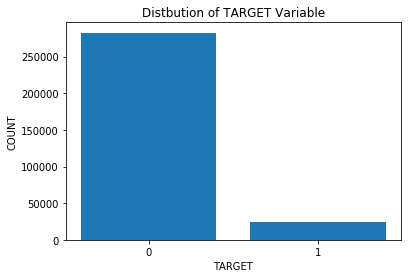

In [46]:
#目的変数の棒グラフ
target_label = [0, 1]
target_0 = (df['TARGET']==0).sum()
target_1 = (df['TARGET']==1).sum()
plt.xlabel('TARGET')
plt.ylabel('COUNT')
plt.title('Distbution of TARGET Variable')
plt.bar(target_label, (target_0, target_1), tick_label = target_label) ;

TARGET1に比べて、TARGET0が明らかに多い。

## 【問題3】 課題設定

データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

- 欠損値が存在する特徴量は、なぜ欠損しているのか？
- 説明変数同士および目的変数と説明変数の関係性

## 【問題4】 データ探索

問題3で設定した課題・疑問を解決するためにデータ探索を進めましょう。過程で新しい疑問点などが生まれた場合は、加えていってください。

課題合格の条件として、表やグラフを 合計15個以上 出力してください。そして、それに対してマークダウンを使い考察を加えていきましょう。

### ・欠損値が存在する特徴量は、なぜ欠損しているのか？

In [47]:
#欠損値
df_na[total > 0]

Total  missing_ratio
COMMONAREA_MEDI               214865      69.872297
COMMONAREA_AVG                214865      69.872297
COMMONAREA_MODE               214865      69.872297
NONLIVINGAPARTMENTS_MODE      213514      69.432963
NONLIVINGAPARTMENTS_MEDI      213514      69.432963
NONLIVINGAPARTMENTS_AVG       213514      69.432963
FONDKAPREMONT_MODE            210295      68.386172
LIVINGAPARTMENTS_MEDI         210199      68.354953
LIVINGAPARTMENTS_MODE         210199      68.354953
LIVINGAPARTMENTS_AVG          210199      68.354953
FLOORSMIN_MEDI                208642      67.848630
FLOORSMIN_MODE                208642      67.848630
FLOORSMIN_AVG                 208642      67.848630
YEARS_BUILD_MEDI              204488      66.497784
YEARS_BUILD_AVG               204488      66.497784
YEARS_BUILD_MODE              204488      66.497784
OWN_CAR_AGE                   202929      65.990810
LANDAREA_MODE                 182590      59.376738
LANDAREA_AVG                  182590      59.376738
LANDAREA_MEDI                 182590      59.376738
BASEMENTAREA_MEDI             179943      58.515956
BASEMENTAREA_AVG              179943      58.515956
BASEMENTAREA_MODE             179943      58.515956
EXT_SOURCE_1                  173378      56.381073
NONLIVINGAREA_MEDI            169682      55.179164
NONLIVINGAREA_AVG             169682      55.179164
NONLIVINGAREA_MODE            169682      55.179164
ELEVATORS_MODE                163891      53.295980
ELEVATORS_AVG                 163891      53.295980
ELEVATORS_MEDI                163891      53.295980
WALLSMATERIAL_MODE            156341      50.840783
APARTMENTS_MODE               156061      50.749729
APARTMENTS_AVG                156061      50.749729
APARTMENTS_MEDI               156061      50.749729
ENTRANCES_MEDI                154828      50.348768
ENTRANCES_MODE                154828      50.348768
ENTRANCES_AVG                 154828      50.348768
LIVINGAREA_MEDI               154350      50.193326
LIVINGAREA_MODE               154350      50.193326
LIVINGAREA_AVG                154350      50.193326
HOUSETYPE_MODE                154297      50.176091
FLOORSMAX_MODE                153020      49.760822
FLOORSMAX_MEDI                153020      49.760822
FLOORSMAX_AVG                 153020      49.760822
YEARS_BEGINEXPLUATATION_MEDI  150007      48.781019
YEARS_BEGINEXPLUATATION_AVG   150007      48.781019
YEARS_BEGINEXPLUATATION_MODE  150007      48.781019
TOTALAREA_MODE                148431      48.268517
EMERGENCYSTATE_MODE           145755      47.398304
OCCUPATION_TYPE                96391      31.345545
EXT_SOURCE_3                   60965      19.825307
AMT_REQ_CREDIT_BUREAU_QRT      41519      13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     41519      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     41519      13.501631
AMT_REQ_CREDIT_BUREAU_MON      41519      13.501631
AMT_REQ_CREDIT_BUREAU_DAY      41519      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     41519      13.501631
NAME_TYPE_SUITE                 1292       0.420148
OBS_30_CNT_SOCIAL_CIRCLE        1021       0.332021
OBS_60_CNT_SOCIAL_CIRCLE        1021       0.332021
DEF_60_CNT_SOCIAL_CIRCLE        1021       0.332021
DEF_30_CNT_SOCIAL_CIRCLE        1021       0.332021
EXT_SOURCE_2                     660       0.214626
AMT_GOODS_PRICE                  278       0.090403
AMT_ANNUITY                       12       0.003902
CNT_FAM_MEMBERS                    2       0.000650
DAYS_LAST_PHONE_CHANGE             1       0.000325

In [48]:
#型の確認
df[df_na[total > 0].index].dtypes

COMMONAREA_MEDI                 float64
COMMONAREA_AVG                  float64
COMMONAREA_MODE                 float64
NONLIVINGAPARTMENTS_MODE        float64
NONLIVINGAPARTMENTS_MEDI        float64
NONLIVINGAPARTMENTS_AVG         float64
FONDKAPREMONT_MODE               object
LIVINGAPARTMENTS_MEDI           float64
LIVINGAPARTMENTS_MODE           float64
LIVINGAPARTMENTS_AVG            float64
FLOORSMIN_MEDI                  float64
FLOORSMIN_MODE                  float64
FLOORSMIN_AVG                   float64
YEARS_BUILD_MEDI                float64
YEARS_BUILD_AVG                 float64
YEARS_BUILD_MODE                float64
OWN_CAR_AGE                     float64
LANDAREA_MODE                   float64
LANDAREA_AVG                    float64
LANDAREA_MEDI                   float64
BASEMENTAREA_MEDI               float64
BASEMENTAREA_AVG                float64
BASEMENTAREA_MODE               float64
EXT_SOURCE_1                    float64
NONLIVINGAREA_MEDI              float64


- **住宅に関する情報**   
    - COMMONAREA
    - NONLIVINGAPARTMENTS
    - FONDKAPREMONT
    - LIVINGAPARTMENTS
    - FLOORSMIN
    - YEARS_BUILD
    - LANDAREA
    - BASEMENTAREA
    - NONLIVINGAREA
    - ELEVATORS
    - WALLSMATERIAL
    - APARTMENTS
    - ENTRANCES
    - LIVINGAREA
    - HOUSETYPE
    - FLOORSMAX
    - YEARS_BEGINEXPLUATATION
    - TOTALAREA
    - EMERGENCYSTATE   
    以上の名前の後に、AVE, MODE, MEDIが付随するもの

In [49]:
df[['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE']][20: 30]

COMMONAREA_MEDI  COMMONAREA_AVG  COMMONAREA_MODE
20              NaN             NaN              NaN
21              NaN             NaN              NaN
22           0.0120          0.0120           0.0121
23           0.1071          0.1064           0.0000
24           0.0214          0.0212           0.0214
25           0.0010          0.0010           0.0010
26              NaN             NaN              NaN
27              NaN             NaN              NaN
28              NaN             NaN              NaN
29           0.0189          0.0188           0.0190

これらは顧客が住んでいる建物の情報に関するものである。欠損しているのは、その建物に存在しないためと思われる。

- **持っている車の年数**
    - OWN_CAR_AGE

In [50]:
df[['FLAG_OWN_CAR', 'OWN_CAR_AGE']].head()

FLAG_OWN_CAR  OWN_CAR_AGE
0            N          NaN
1            N          NaN
2            Y         26.0
3            N          NaN
4            N          NaN

In [51]:
#車を持っていない人数
len(df[df['FLAG_OWN_CAR'] == 'N'])

202924

FLAG_OWN_CARは車を所持しているかどうかを示している。FLAG_OWN_CARの欠損値数差は202929なので、ほとんどが車を持っていないため欠損していると思われる。

- **外部データソースからの正規化スコア**
    - EXT_SOURCE_1
    - EXT_SOURCE_2
    - EXT_SOURCE_3   

In [52]:
df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].head()

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3
0      0.083037      0.262949      0.139376
1      0.311267      0.622246           NaN
2           NaN      0.555912      0.729567
3           NaN      0.650442           NaN
4           NaN      0.322738           NaN

データがないため欠損していると思われる。どのようなデータか不明。

- **仕事の種類**
    - OCCUPATION_TYPE   

In [53]:
df[['OCCUPATION_TYPE', 'NAME_INCOME_TYPE']][30:40]

OCCUPATION_TYPE      NAME_INCOME_TYPE
30                    NaN  Commercial associate
31  Private service staff               Working
32               Laborers               Working
33                Drivers  Commercial associate
34             Core staff         State servant
35            Sales staff               Working
36  Private service staff  Commercial associate
37                Drivers               Working
38                    NaN             Pensioner
39               Managers               Working

In [54]:
#NAME_INCOME_TYPEがPensionerの時の欠損値の割合
df_pensioner = df[df['NAME_INCOME_TYPE']=='Pensioner'][['OCCUPATION_TYPE', 'NAME_INCOME_TYPE']]
len(df_pensioner) / df['OCCUPATION_TYPE'].isnull().sum()

0.5743482275316161

NAME_INCOME_TYPEは収入の種類を示しており、年金受給者などが欠損している。欠損値は年金受給者が約57%を占めており、それ以外で欠損しているのは働いていないか、恣意的なもの？

- **Credit Bureauへの問い合わせ件数に関するもの**
    - AMT_REQ_CREDIT_BUREAU_QRT
    - AMT_REQ_CREDIT_BUREAU_YEAR
    - AMT_REQ_CREDIT_BUREAU_MON
    - AMT_REQ_CREDIT_BUREAU_WEEK
    - AMT_REQ_CREDIT_BUREAU_DAY	
    - AMT_REQ_CREDIT_BUREAU_HOUR

In [55]:
df[['TARGET', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR']].head()

TARGET  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0       1                        0.0                         1.0   
1       0                        0.0                         0.0   
2       0                        0.0                         0.0   
3       0                        NaN                         NaN   
4       0                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        NaN                         NaN   
4                        0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_HOUR  
0                        0.0                         0.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0

0が存在するので、問い合わせ件数が0の場合に欠損しているわけではなさそう。ランダム的もしくは恣意的?

- **ローン適用時の同伴者**
    - NAME_TYPE_SUITE

In [56]:
df[['NAME_TYPE_SUITE']][60: 65]

NAME_TYPE_SUITE
60          Family
61   Unaccompanied
62   Unaccompanied
63          Family
64             NaN

Unacocmpaniedが存在するため、同伴者がいなかったから欠損しているわけではなさそう。ランダム的もしくは恣意的?

- **延滞に関する情報**
    - OBS_30_CNT_SOCIAL_CIRCLE
    - OBS_60_CNT_SOCIAL_CIRCLE
    - DEF_30_CNT_SOCIAL_CIRCLE
    - DEF_60_CNT_SOCIAL_CIRCLE

In [57]:
df[['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'TARGET']][385: 400]

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
385                       1.0                       1.0   
386                       0.0                       0.0   
387                       0.0                       0.0   
388                       1.0                       1.0   
389                       0.0                       0.0   
390                       0.0                       0.0   
391                       0.0                       0.0   
392                       0.0                       0.0   
393                       0.0                       0.0   
394                       NaN                       NaN   
395                       0.0                       0.0   
396                       0.0                       0.0   
397                       NaN                       NaN   
398                       0.0                       0.0   
399                       1.0                       1.0   

     DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  TARGET  
385                       1.0                       1.0       0  
386                       0.0                       0.0       0  
387                       0.0                       0.0       0  
388                       0.0                       0.0       0  
389                       0.0                       0.0       1  
390                       0.0                       0.0       0  
391                       0.0                       0.0       0  
392                       0.0                       0.0       0  
393                       0.0                       0.0       0  
394                       NaN                       NaN       0  
395                       0.0                       0.0       0  
396                       0.0                       0.0       0  
397                       NaN                       NaN       0  
398                       0.0                       0.0       0  
399                       0.0                       0.0       0

欠損している理由は不明。ランダム的もしくは恣意的?

- **ローンについて**
    - AMT_GOODS_PRICE
    - AMT_ANNUITY

AMT_GOODS_PRICE：ローンを受ける目的の商品の値段。つまり、商品以外の目的でローンを受けるから欠損していると思われる。   
AMT_ANNUITY：ローン年金。受けてないから欠損していると思われる。

- **家族が何人いるか**
    - CNT_FAM_MEMBERS

In [58]:
#CNT_FAM_MEMBERSが0の場合
df[df['CNT_FAM_MEMBERS'] == 0]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, APARTMENTS_AVG, BASEMENTAREA_AVG, YEARS_BEGINEXPLUATATION_AVG, YEARS_BUILD_AVG, COMMONAREA_AVG, ELEVATORS_AVG, ENTRANCES_AVG, FLOORSMAX_AVG, FLOORSMIN_AVG, LANDAREA_AVG, LIVINGAPARTMENTS_AVG, LIVINGAREA_AVG, NONLIVINGAPARTMENTS_AVG, NONLIVINGAREA_AVG, APARTMENTS_MODE, BASEMENTAREA_MODE, YEARS_BEGINEXPLUATATION_MODE, YEARS_BUILD_MODE, COMMONAREA_MODE, ELEVATORS_MODE, ENTRANCES_MODE, FLOORSMAX_MODE, FLOORSMIN_MODE, LANDAREA_MODE, LIVINGAPARTMENTS_MODE, LIVINGAREA_MODE, NONLIVINGAPARTMENTS_MODE, NONLIVINGAREA_MODE, APARTMENTS_MEDI, BASEMENTAREA_MEDI, YEARS_BEGINEXPLUATATION_MEDI, YEARS_BUILD_MEDI, COMMONAREA_MEDI, ELEVATORS_MEDI, ENTRANCES_MEDI, FLOORSMAX_MEDI, FLOORSMIN_MEDI, LANDAREA_MEDI, LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, NONLIVINGAPARTMENTS_MEDI, NONLIVINGAREA_MEDI, FONDKAPREMONT_MODE, HOUSETYPE_MODE, TOTALAREA_MODE, WALLSMATERIAL_MODE, EMERGENCYSTATE_MODE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, ...]
Index: []

In [59]:
df[['CNT_FAM_MEMBERS']][41980: 41990]

CNT_FAM_MEMBERS
41980              1.0
41981              2.0
41982              NaN
41983              2.0
41984              2.0
41985              1.0
41986              3.0
41987              3.0
41988              5.0
41989              2.0

家族がいないため欠損していると思われる。

- **適用前の何日前に電話を変えたか**
    - DAYS_LAST_PHONE_CHANGE

In [60]:
df[['DAYS_LAST_PHONE_CHANGE', 'FLAG_PHONE']][15709: 15715]

DAYS_LAST_PHONE_CHANGE  FLAG_PHONE
15709                     NaN           0
15710                 -1535.0           0
15711                  -156.0           1
15712                 -2543.0           1
15713                     0.0           0
15714                 -1501.0           1

FLAG_PHONEは家の電話番号を提供したかどうかを示しており、1=YES, 0=NOである。DAYS_LAST_PHONE_CHANGEに0が存在するため、欠損している理由はランダム的もしくは恣意的と思われる。欠損しているのはFLAG_PHONEが0(=NO)の人であるため、埋めるなら0で埋めて問題ないと思われる。

### ・説明変数同士および目的変数と説明変数の関係性

#### ・object型の説明変数に関して、TARGETのラベルごとに棒グラフを出力して、ユニーク値ごとの総数を確認、また、円グラフを出力して、ユニーク値の割合を確認する。

In [61]:
#object型の特徴量名
df_object = df.select_dtypes(include=object).columns

In [62]:
def count_pie(feature):
    '''
    countplotとpieplotを表示させる関数
    Parameter
    -------------
    feature : object
        特徴量名
    '''    
    print()
    print('-' * 180)
    
    #countplot
    plt.subplots(figsize=(18, 6))
    c = sns.countplot(df[feature], hue=df['TARGET'])
    c.set_xticklabels(c.get_xticklabels(),rotation=90)
    plt.show()
    
    #pieplot
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
    ax1.pie(df[df['TARGET']==0][feature].value_counts(), startangle=90, 
            autopct="%1.1f%%", labels=list(df[df['TARGET']==0][feature].value_counts().index))
    ax2.pie(df[df['TARGET']==1][feature].value_counts(), startangle=90, 
            autopct="%1.1f%%", labels=list(df[df['TARGET']==1][feature].value_counts().index))
    
    #title
    ax1.set_title(i + '(TARGET = 0)')
    ax2.set_title(i + '(TARGET = 1)')

    plt.show()
    
    print()


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


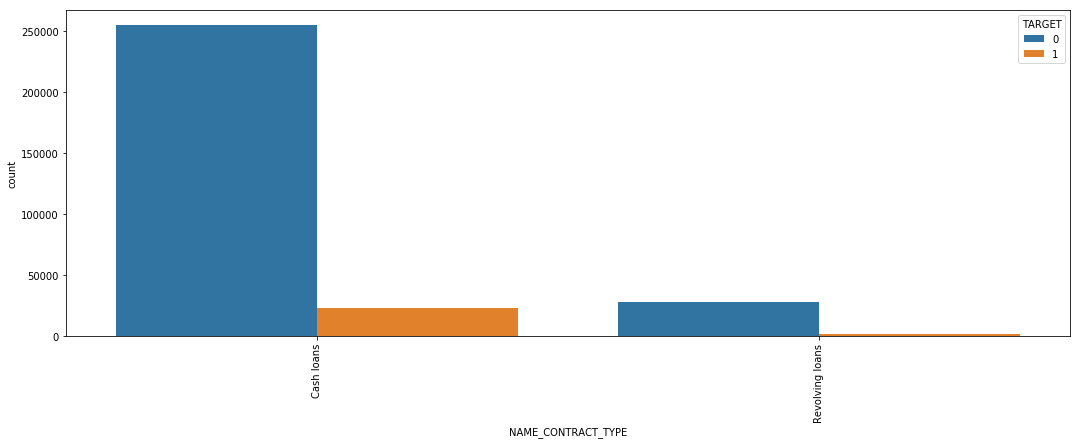

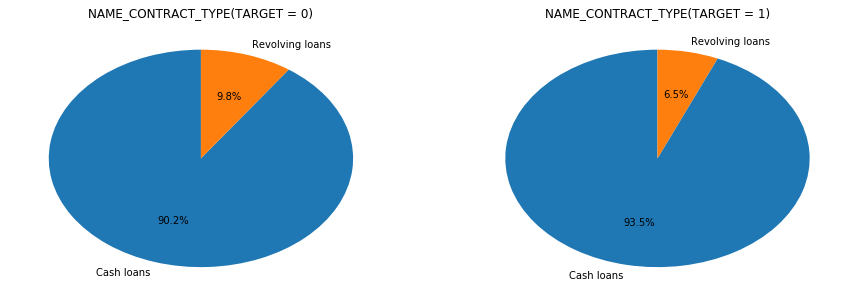



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


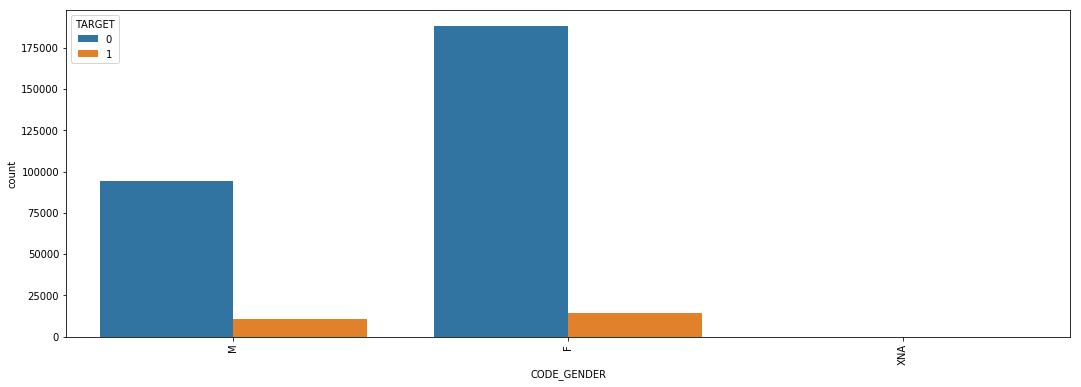

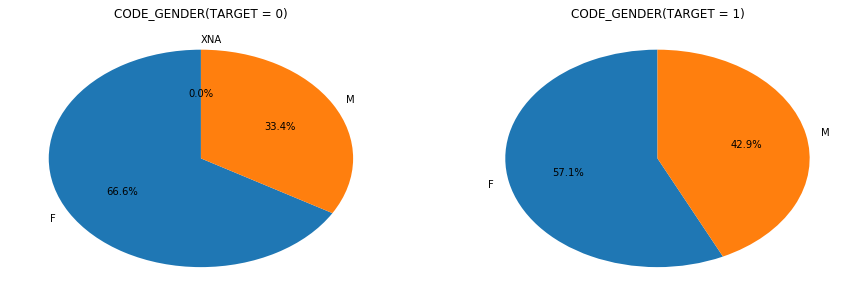



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


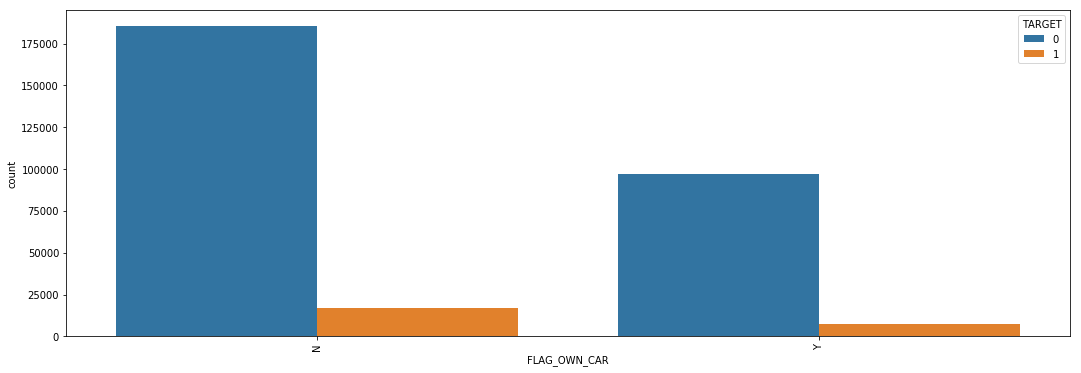

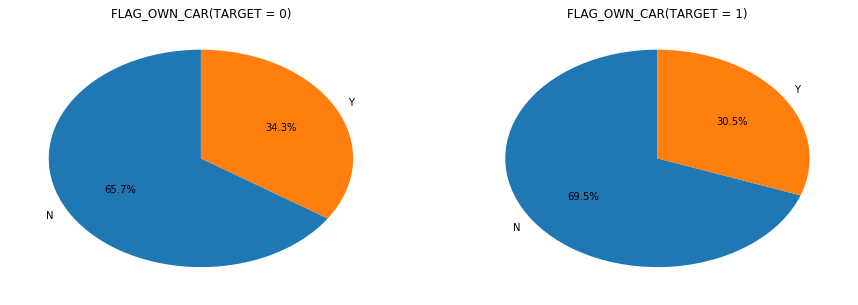



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


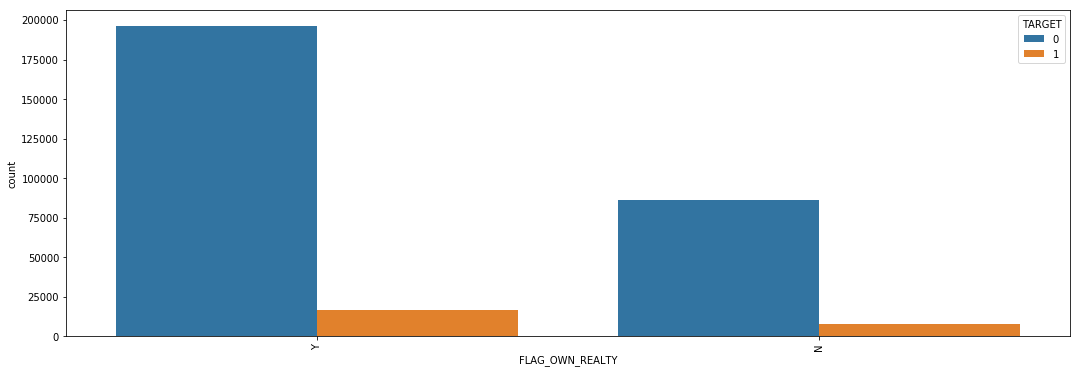

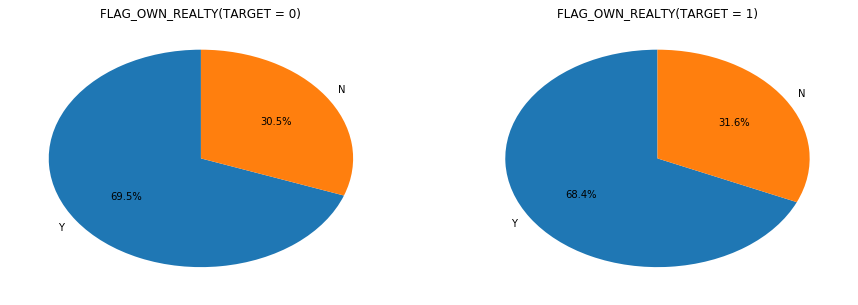



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


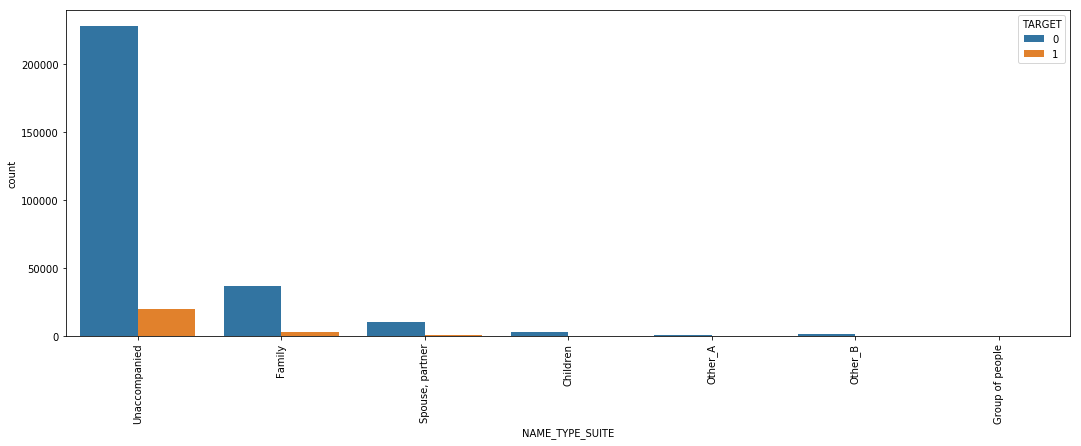

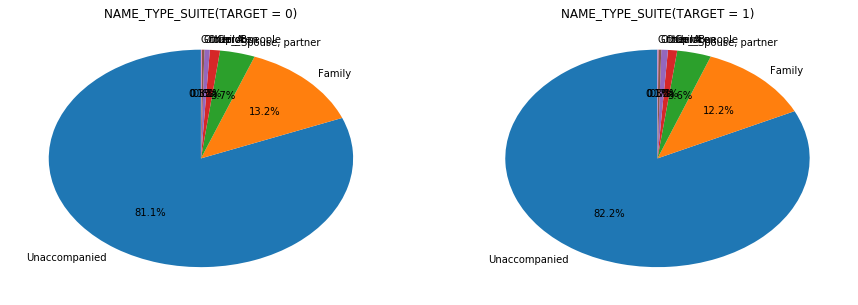



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


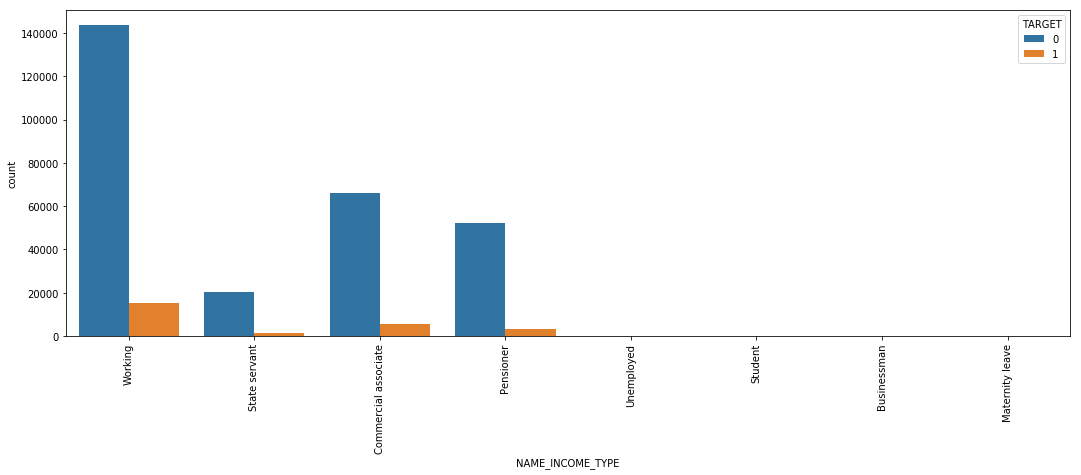

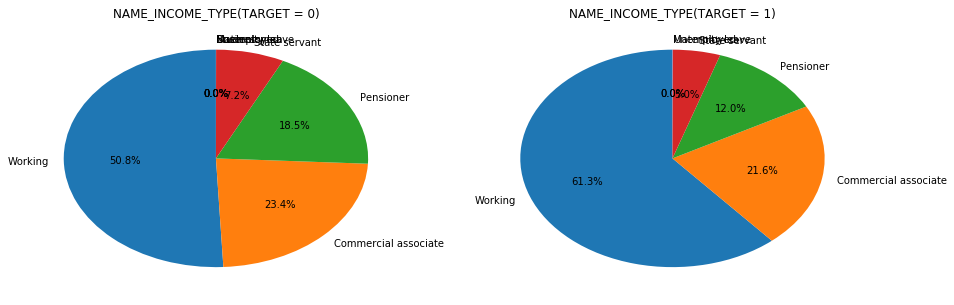



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


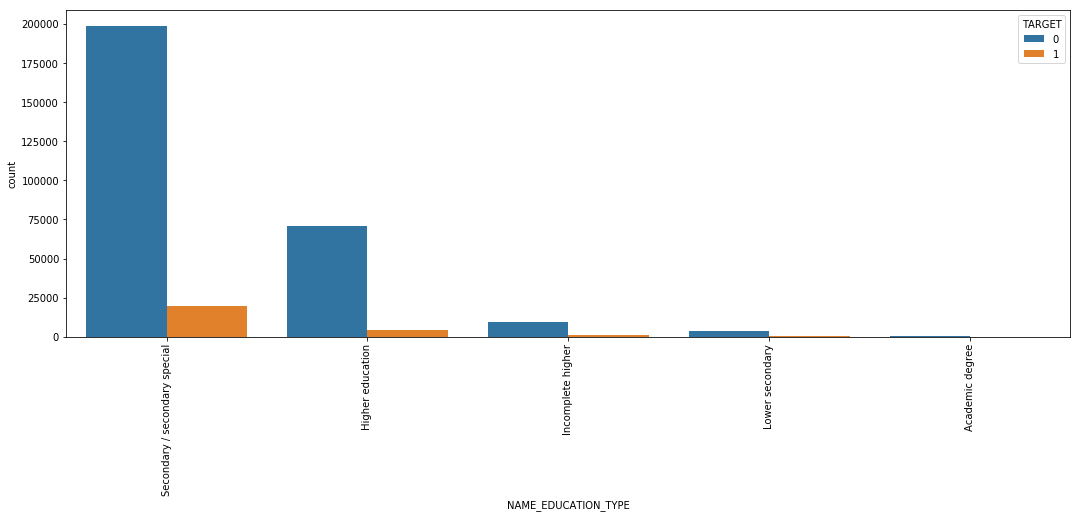

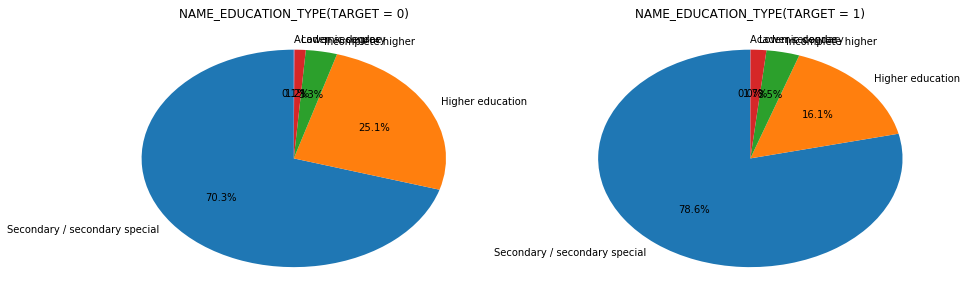



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


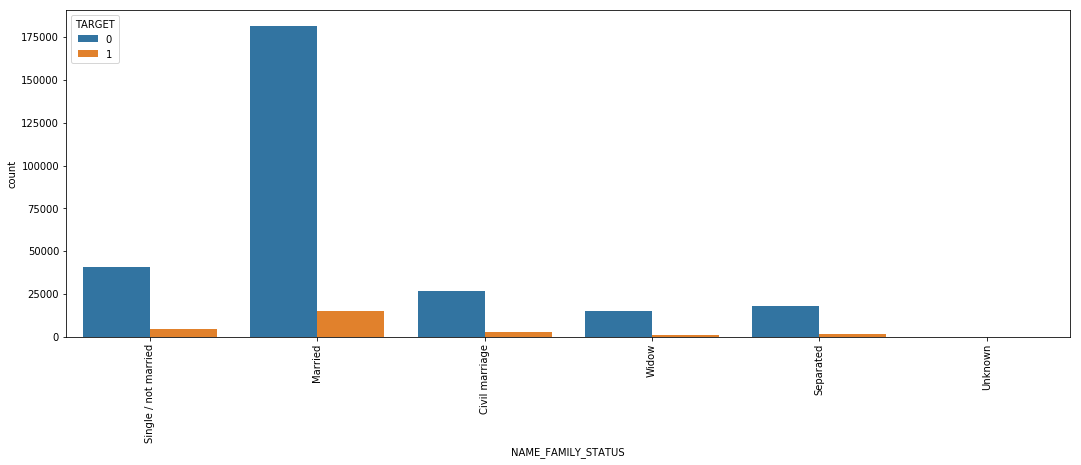

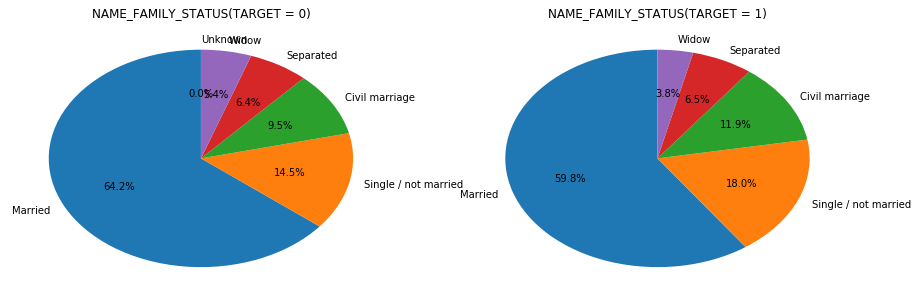



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


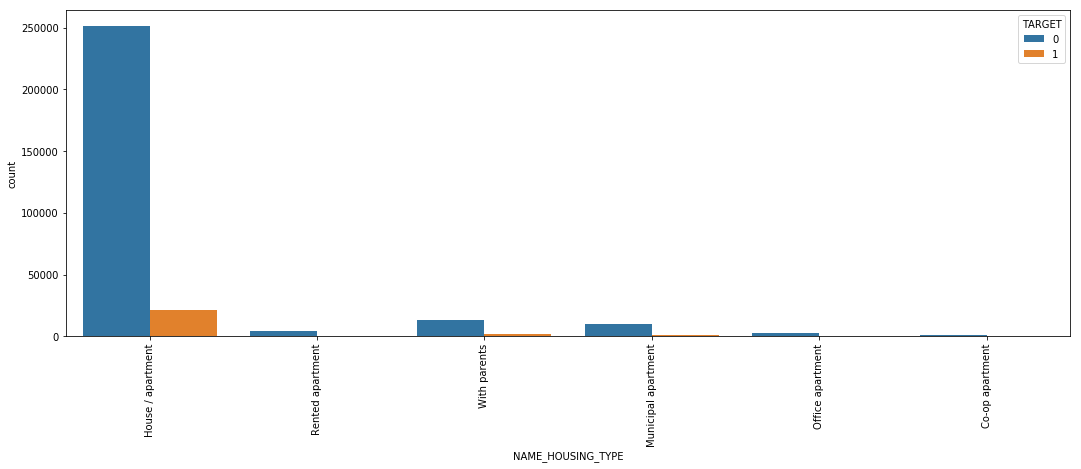

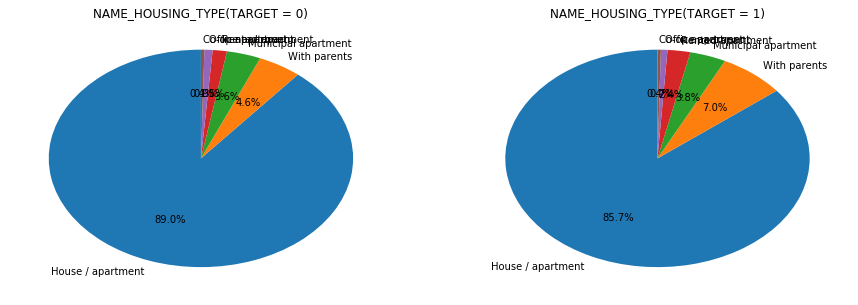



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


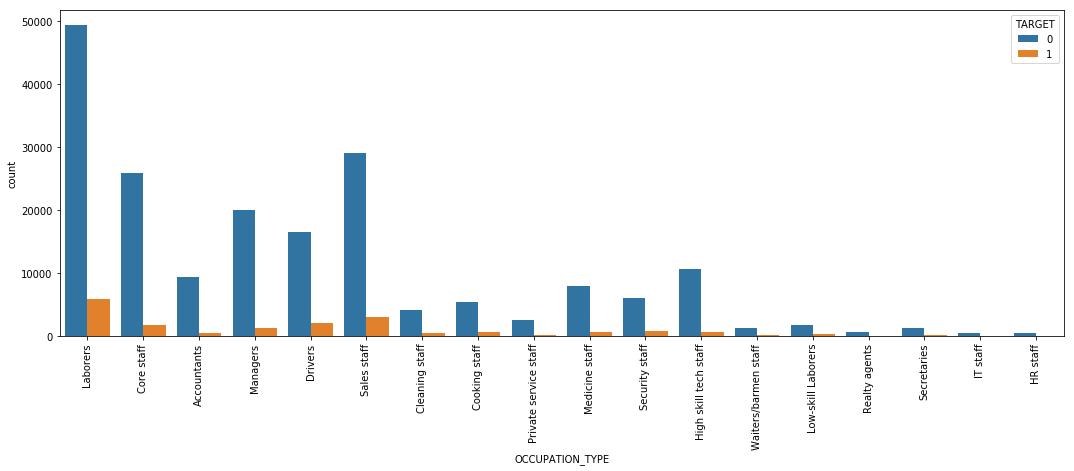

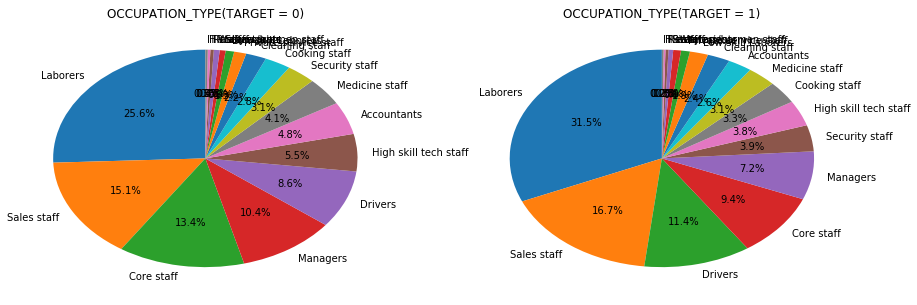



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


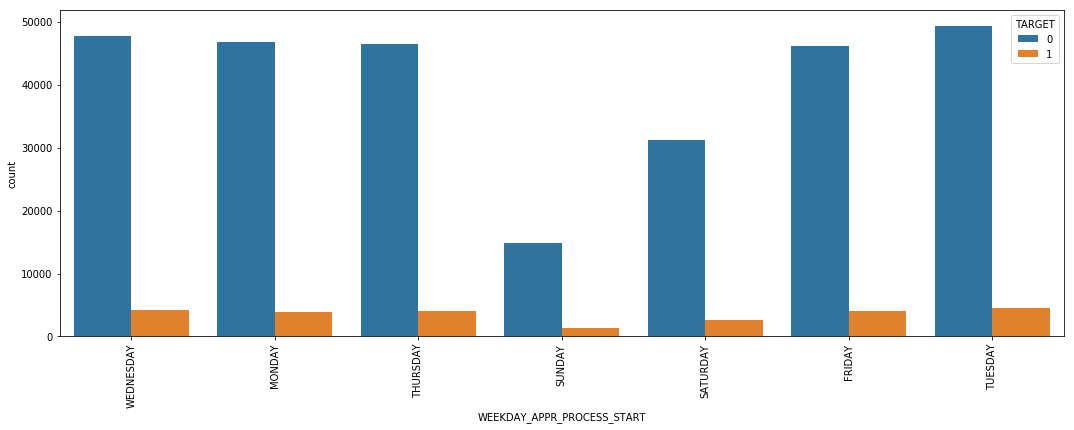

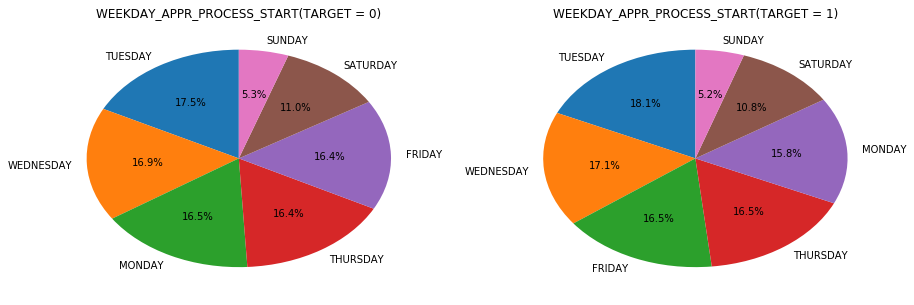



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


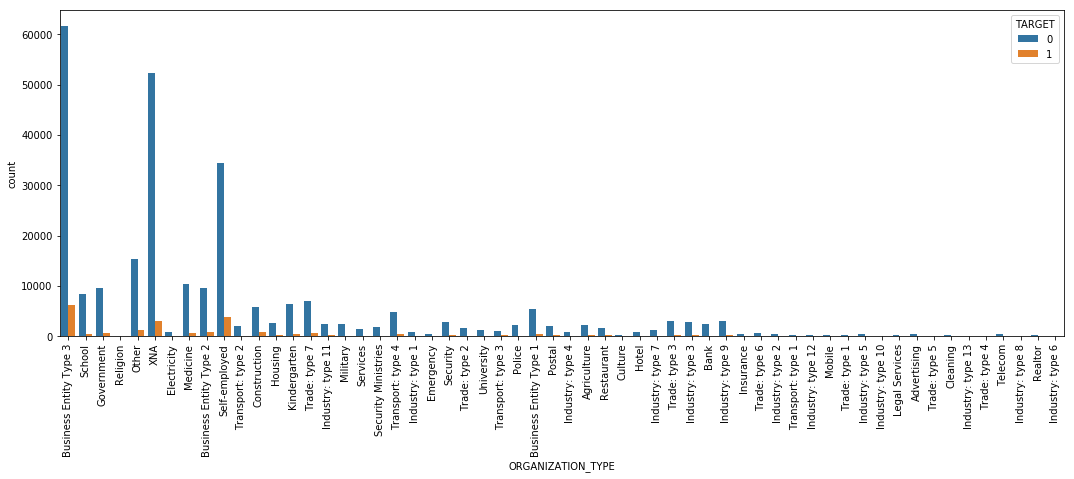

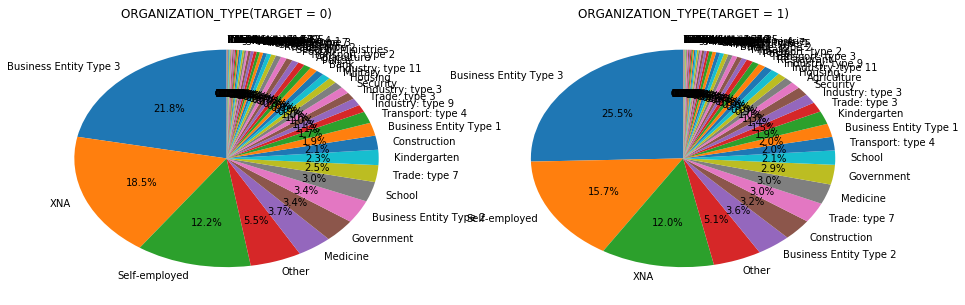



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


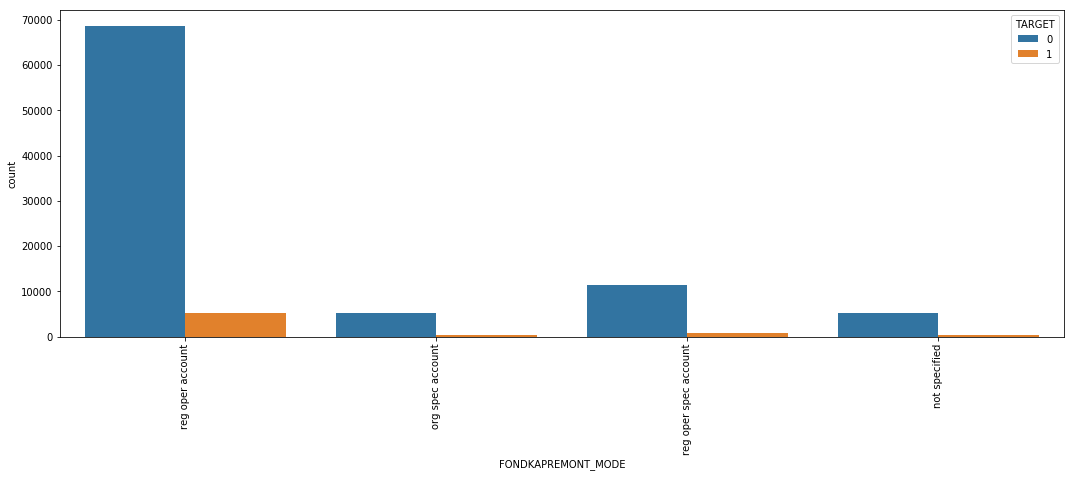

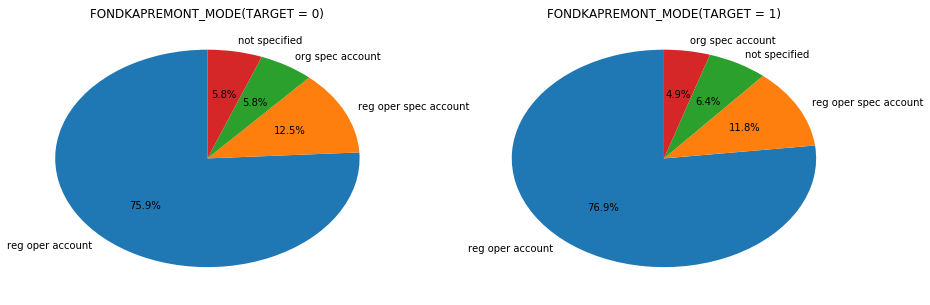



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


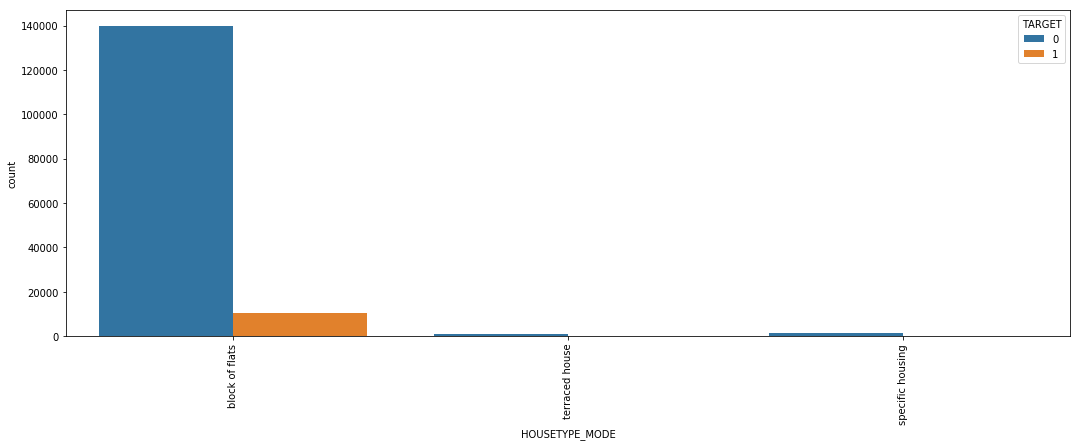

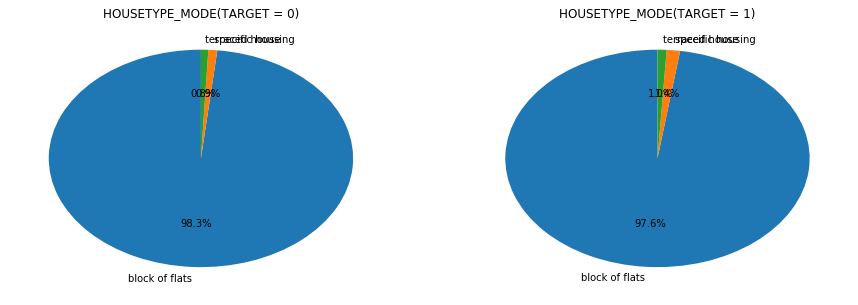



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


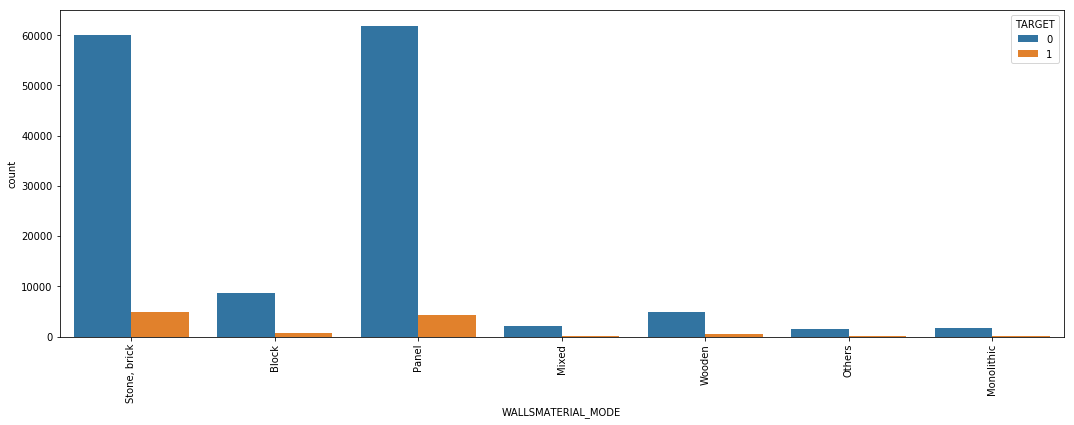

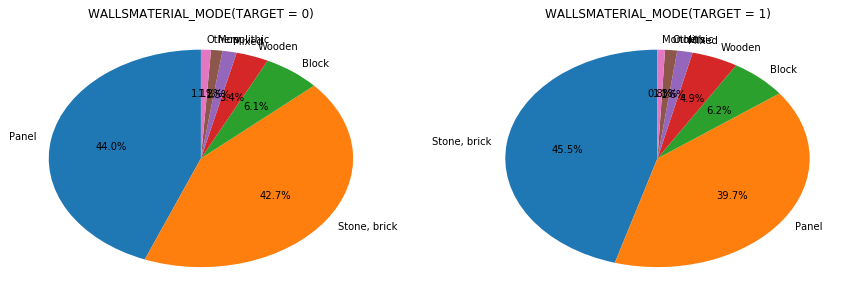



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


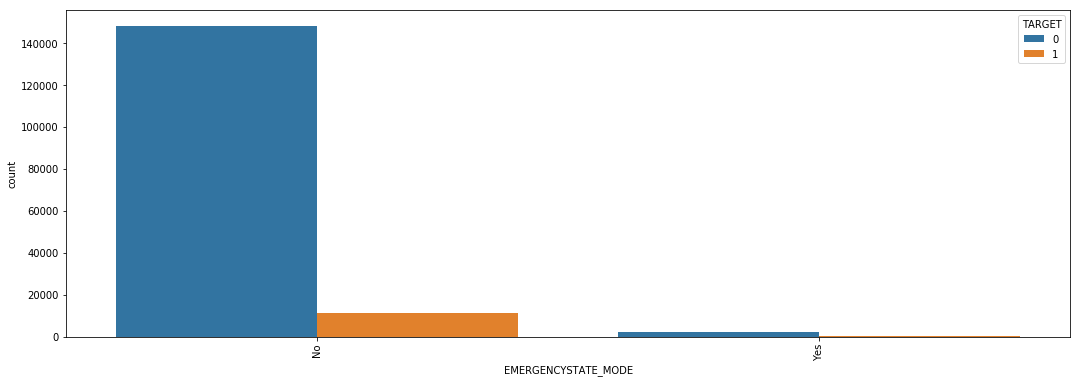

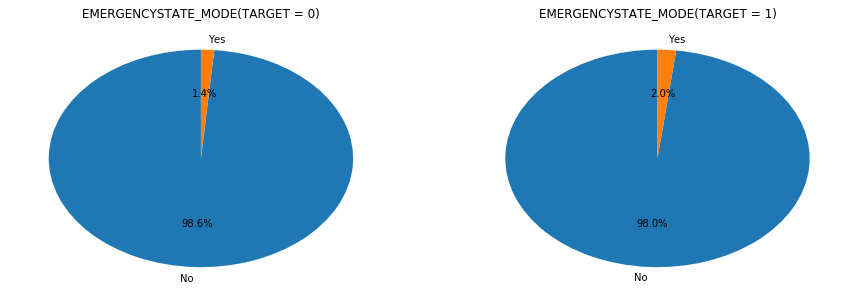

In [63]:
#object型の特徴量名の数だけcountplotとpieplotを表示
for i in df_object:
    count_pie(i)

TARGETが0と1の場合に分け、各特徴量に含まれるユニーク値ごとに、総数と割合を可視化した。総数ではほぼどの特徴量でもTARGETごとに偏りが見られたが、割合はどちらもほぼ同じであった。

#### ・float型の説明変数に関して、ヒストグラムとバイオリンプロットを出力して目的変数との関係を見る。欠損値はとりあえず削除。連続型か離散型かも一旦無視する。

In [64]:
#float型の特徴量名
df_float = df.select_dtypes(include=[np.float64]).columns

In [65]:
def dist_biolin(feature):
    '''
    distplotとbiolinplotを表示させる関数
    Parameter
    -------------
    feature : object
        特徴量名
    '''
    #1行に2つ図を表示
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(13, 6))
    
    #distplot
    sns.distplot(df[feature][df['TARGET']==0].dropna(), label='0', ax=ax1)
    sns.distplot(df[feature][df['TARGET']==1].dropna(), label='1', ax=ax1)
    
    #violinplot
    sns.violinplot(ax=ax2, x=df['TARGET'], y=df[feature])
    
    #凡例
    ax1.legend(title='TARGET')

    plt.show()

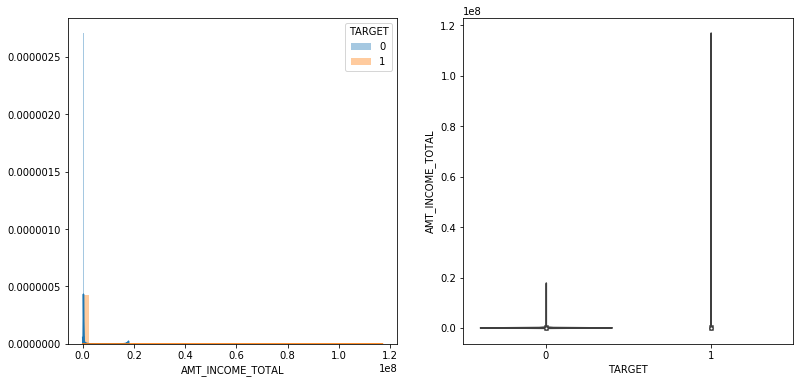

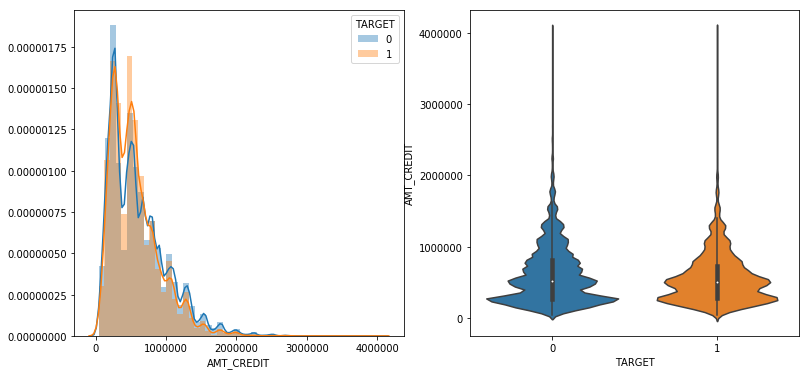

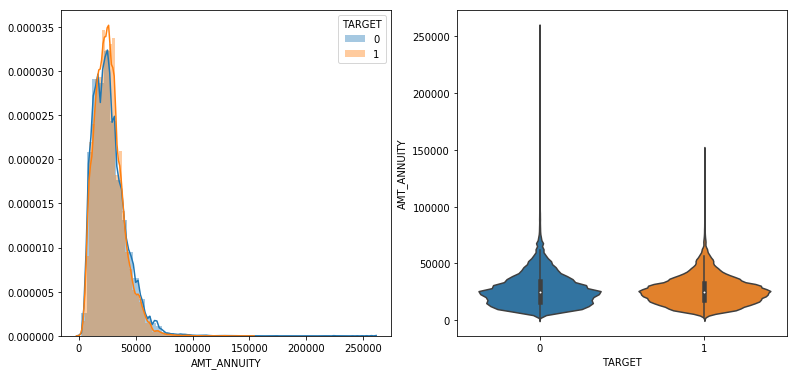

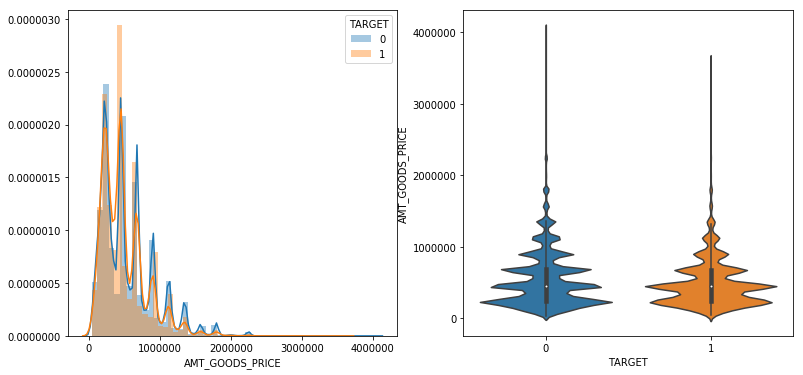

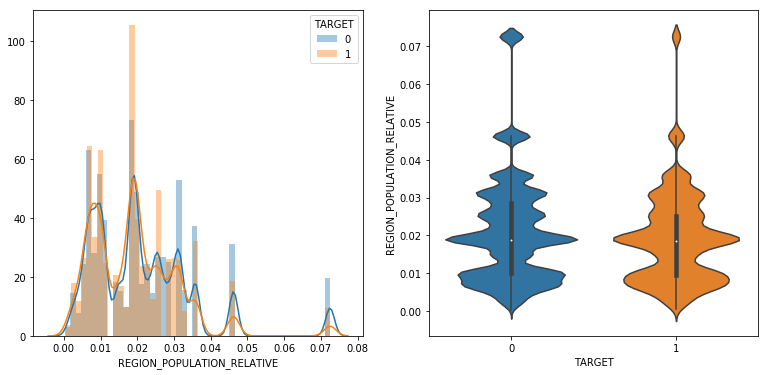

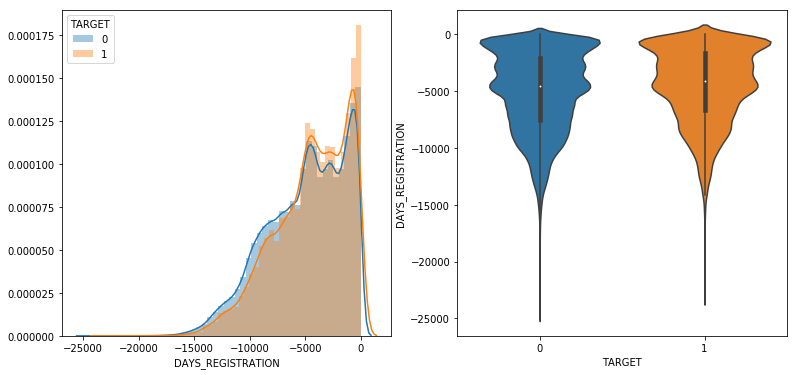

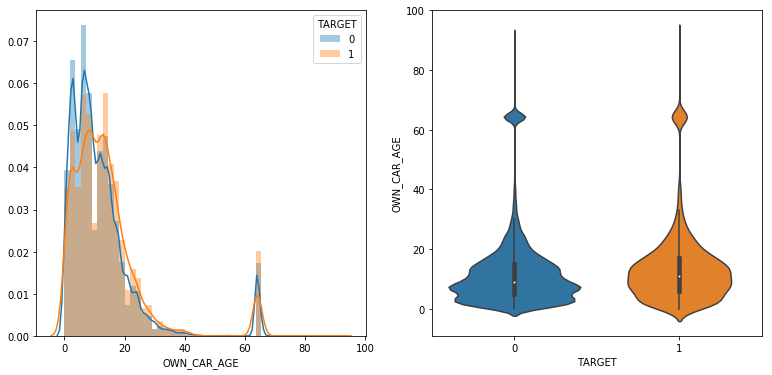

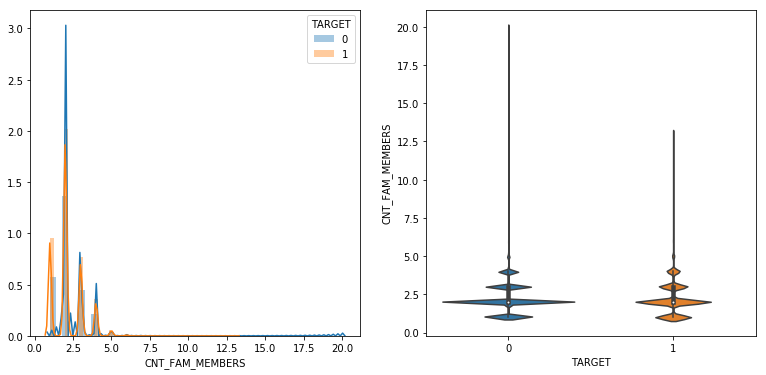

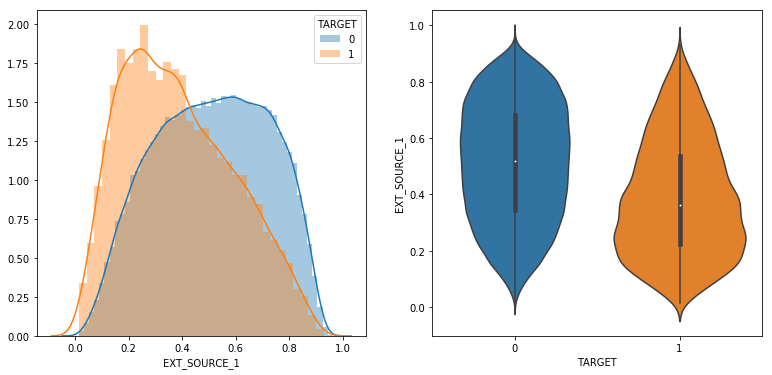

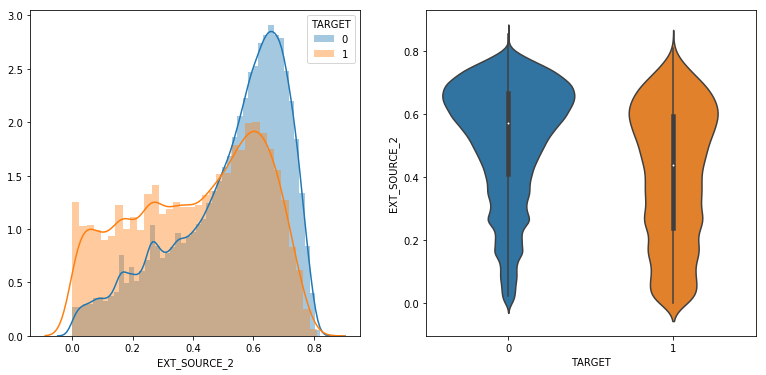

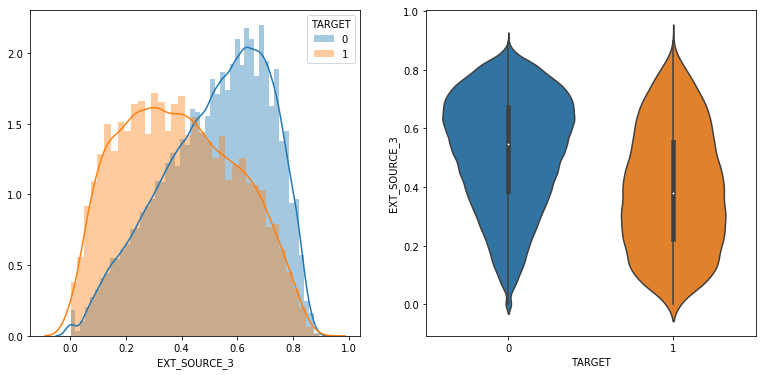

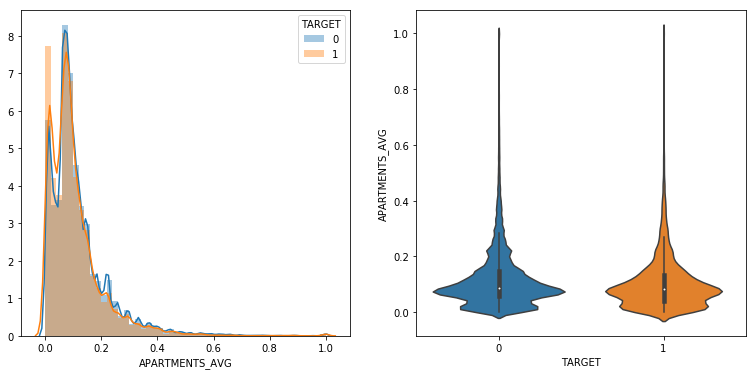

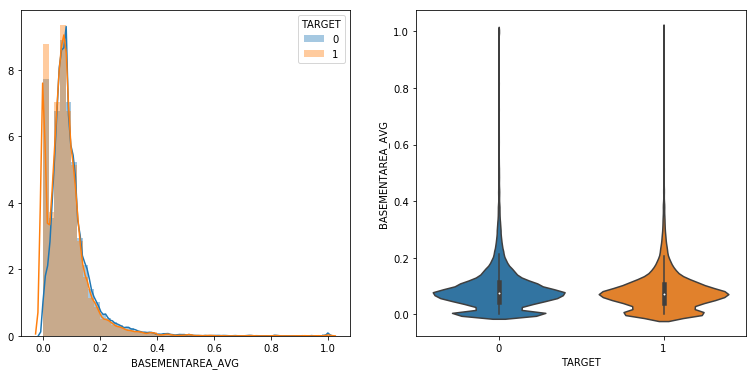

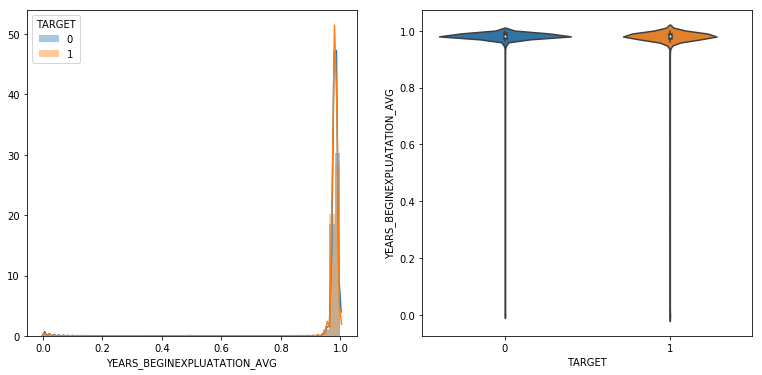

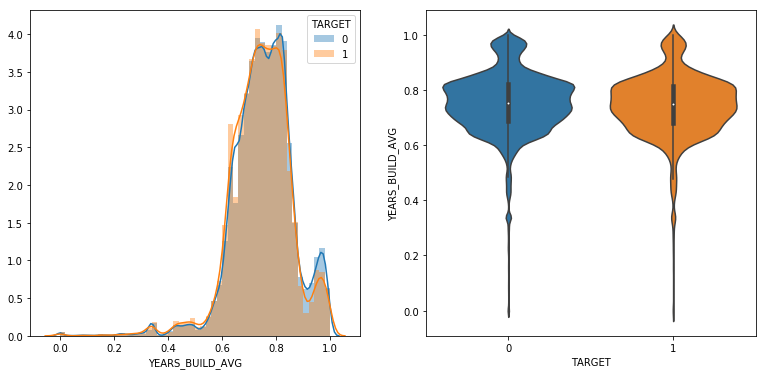

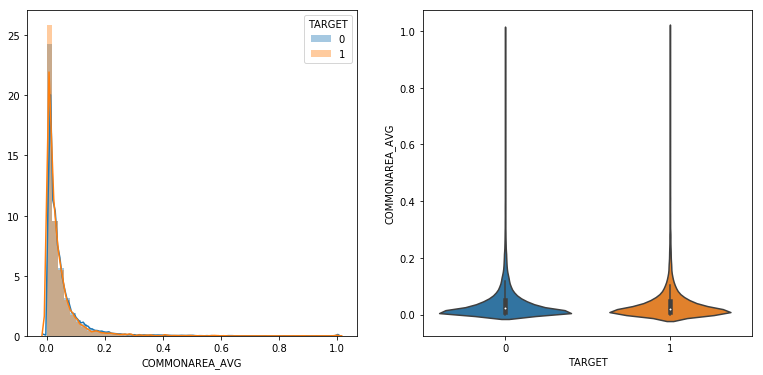

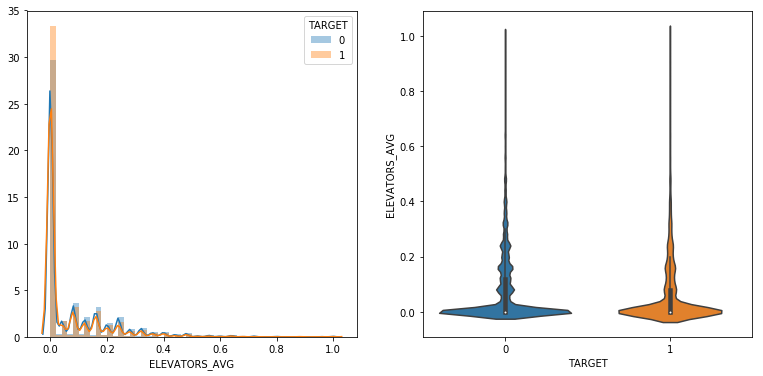

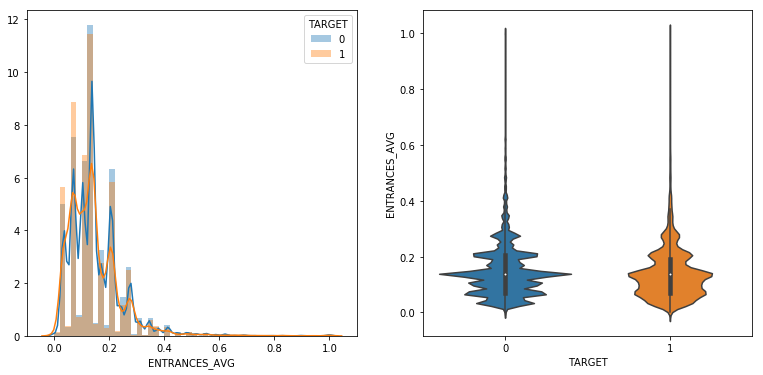

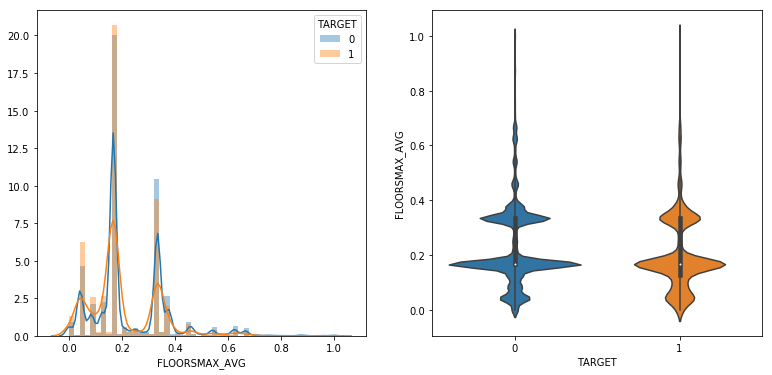

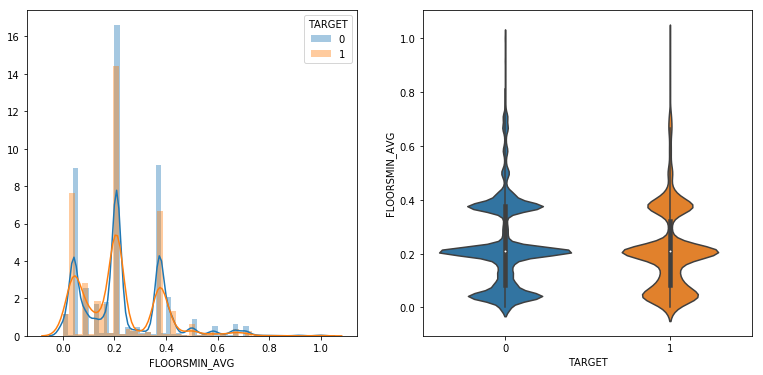

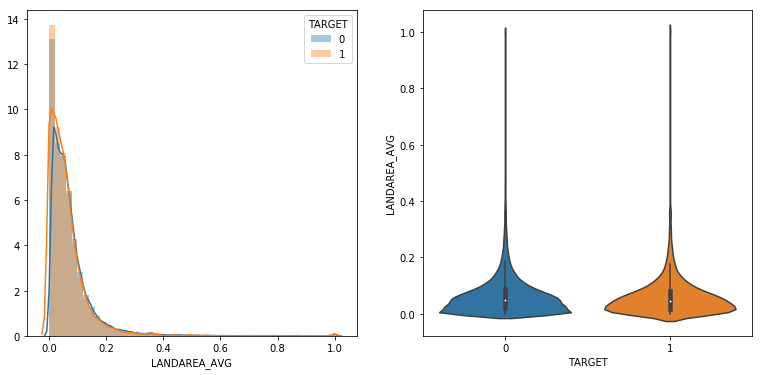

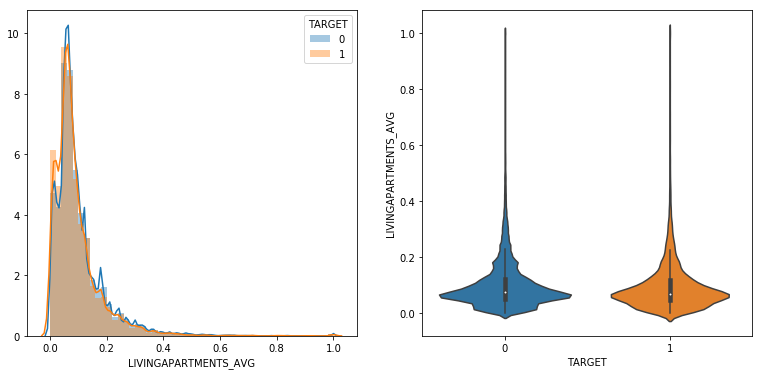

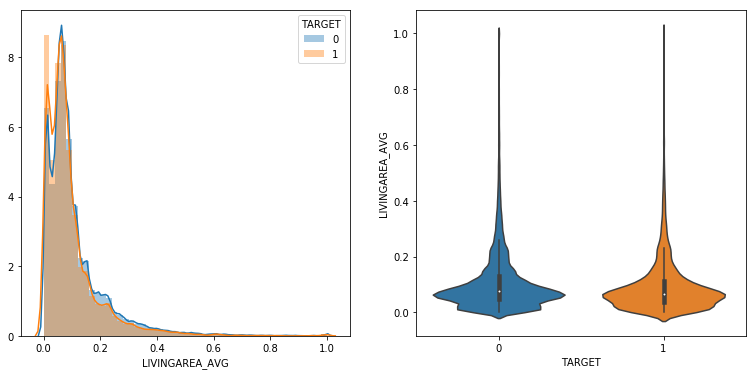

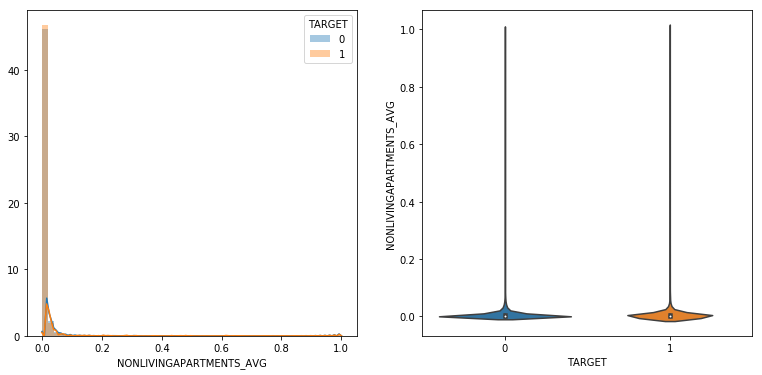

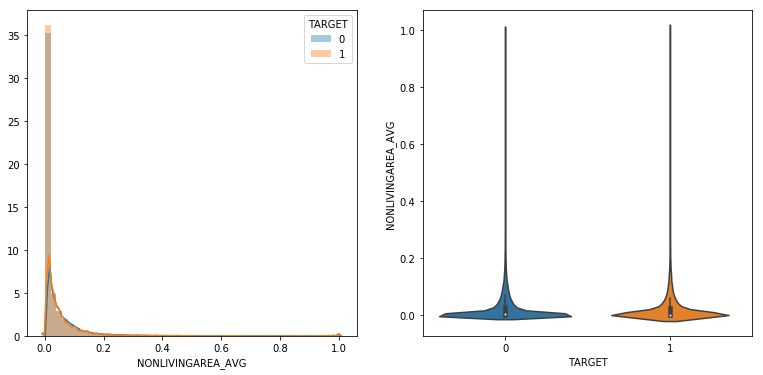

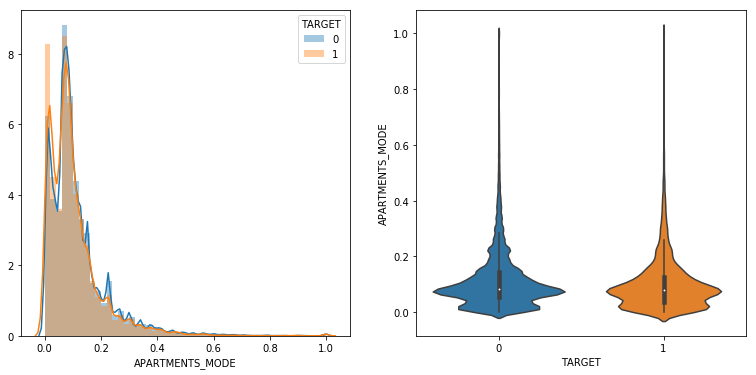

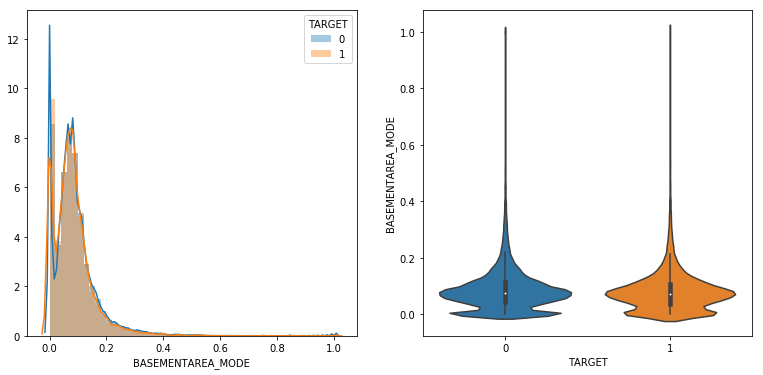

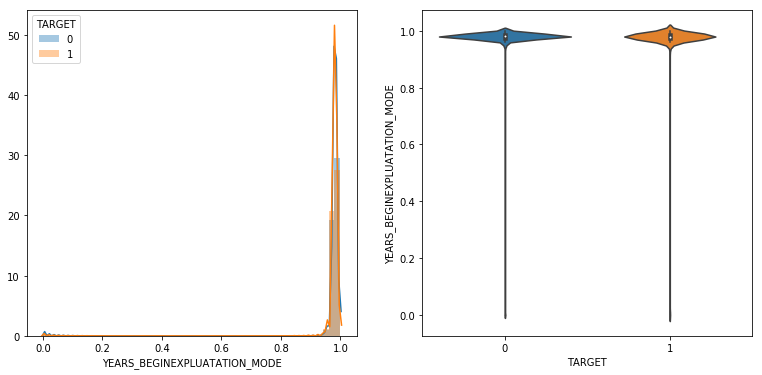

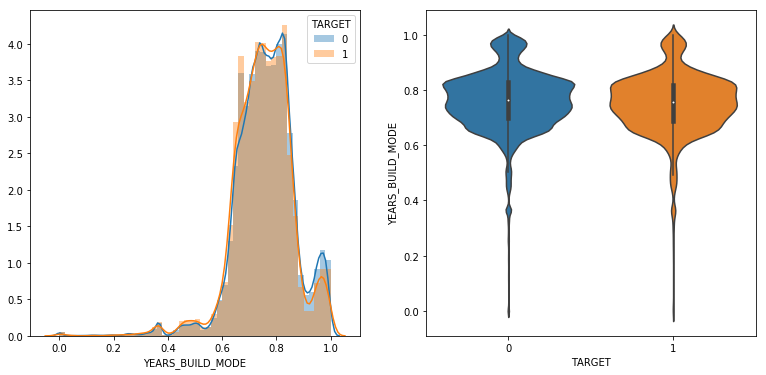

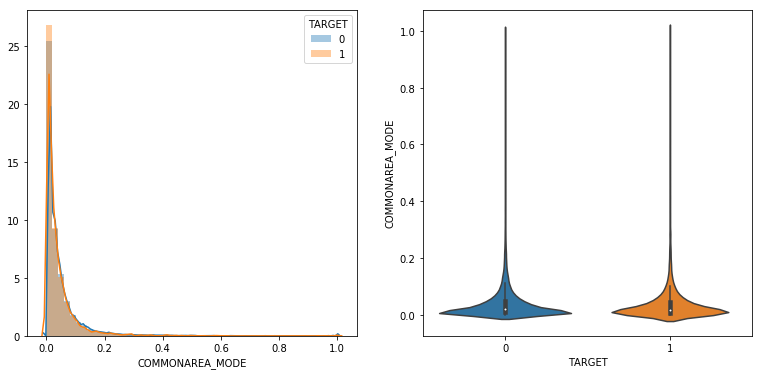

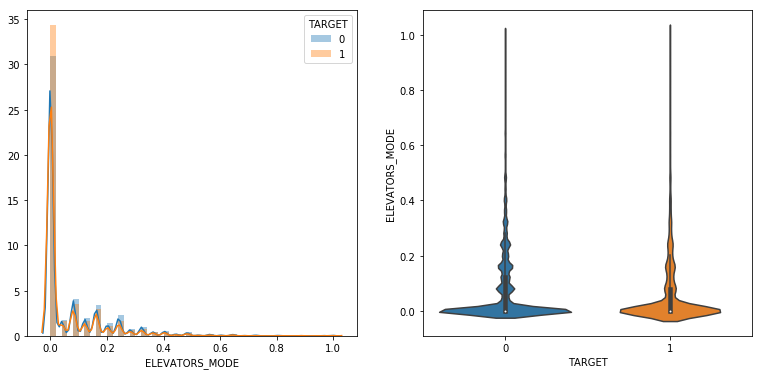

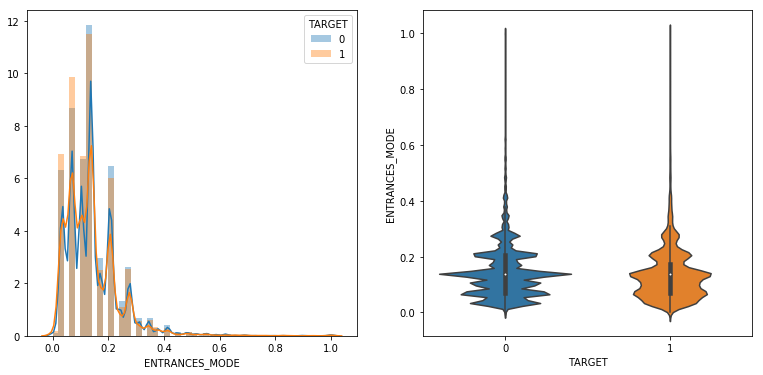

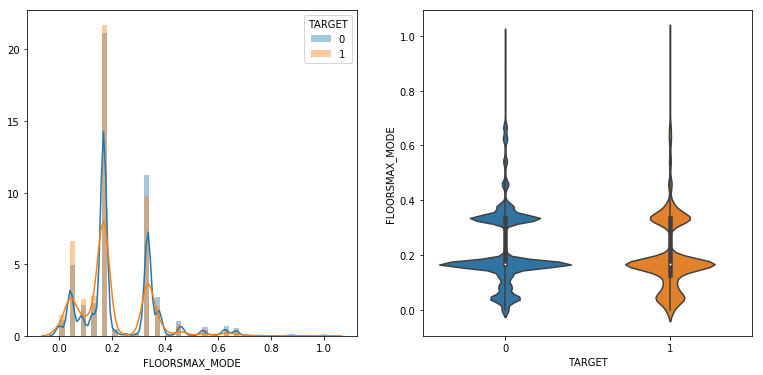

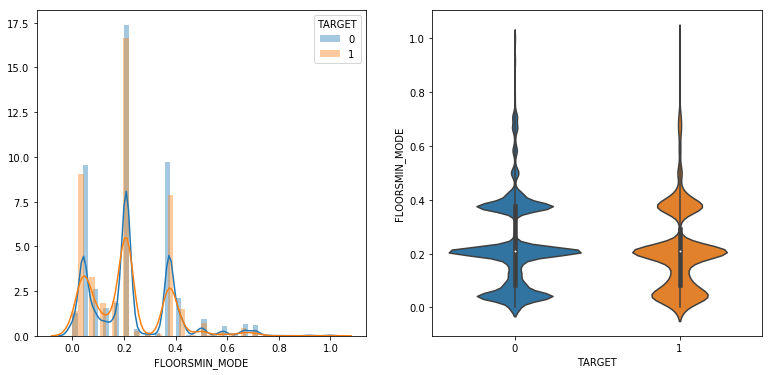

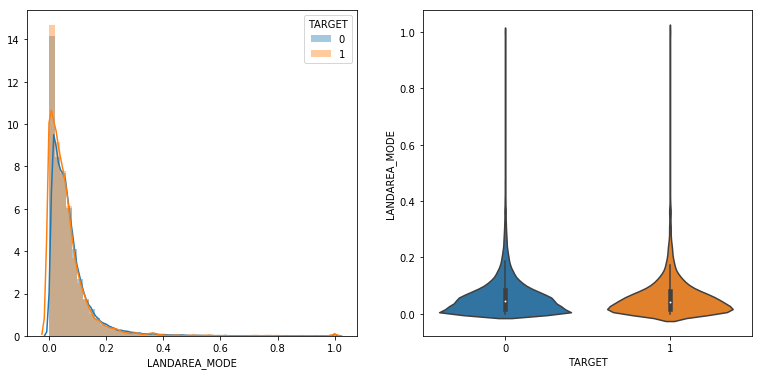

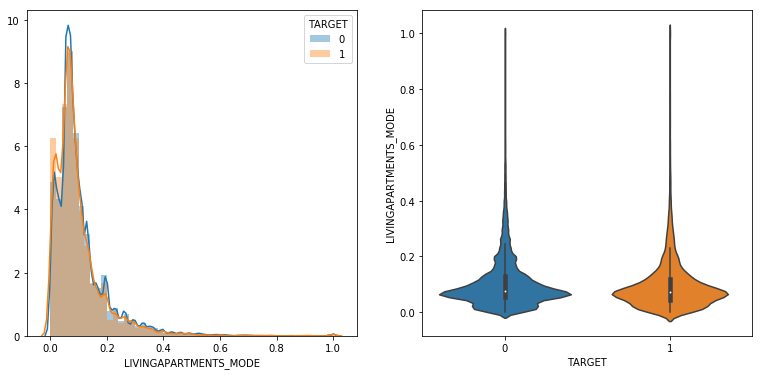

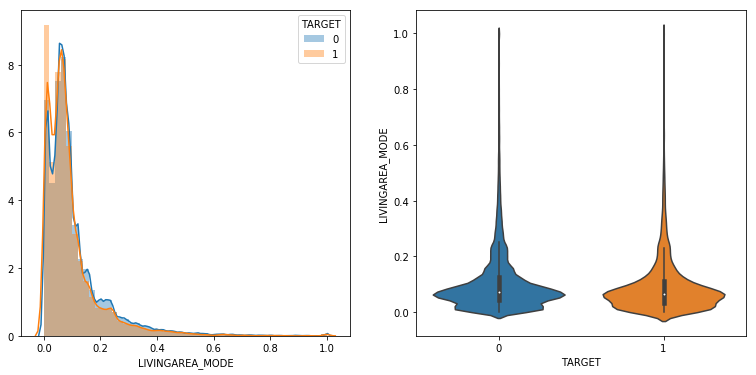

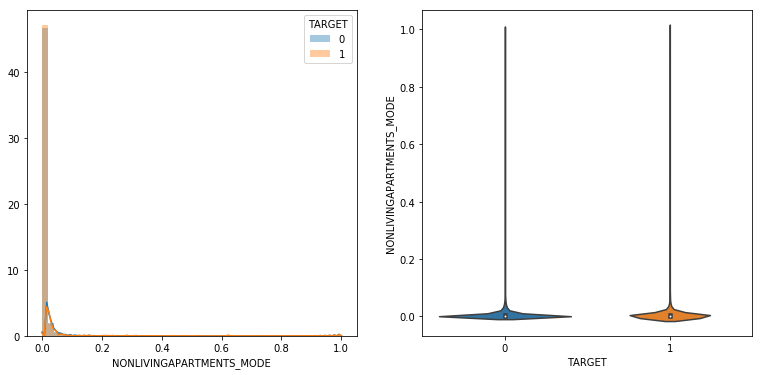

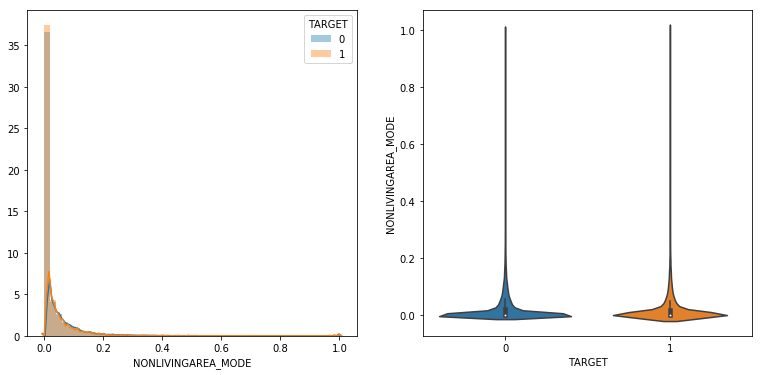

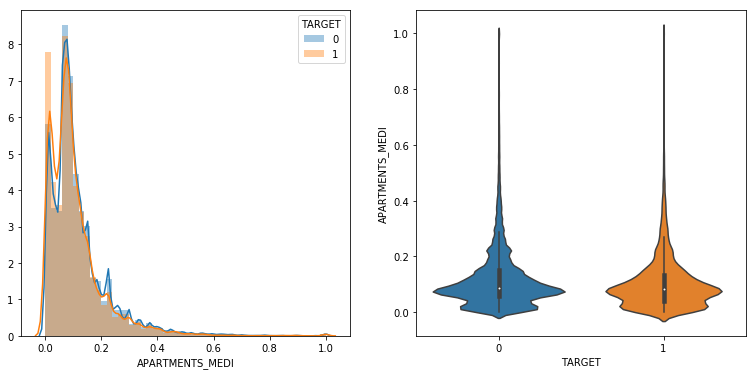

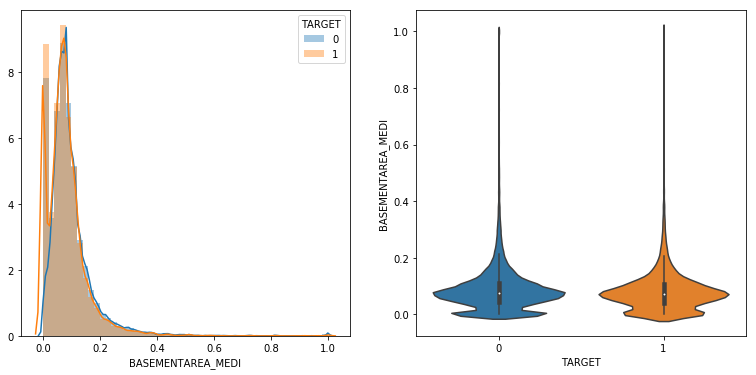

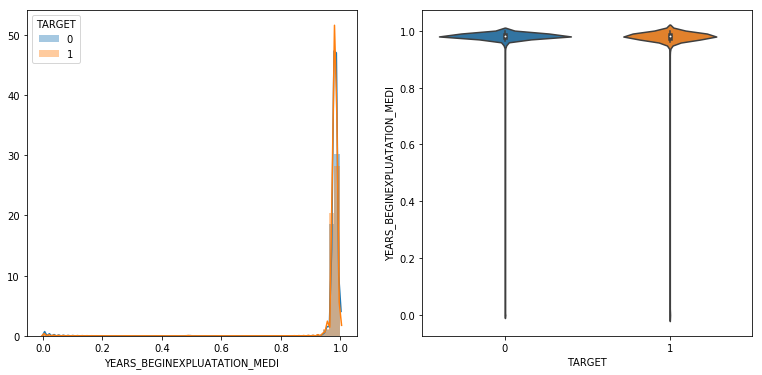

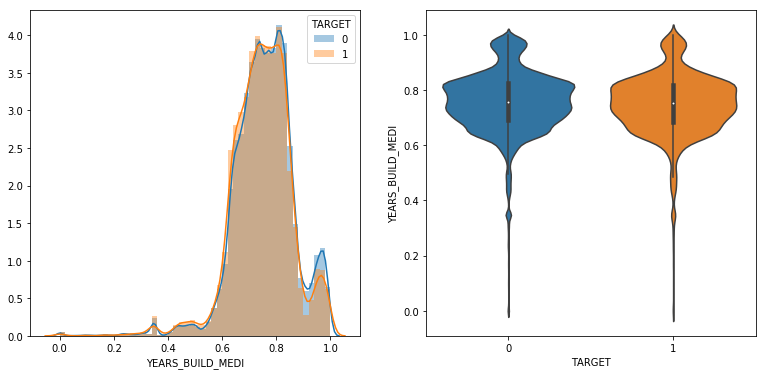

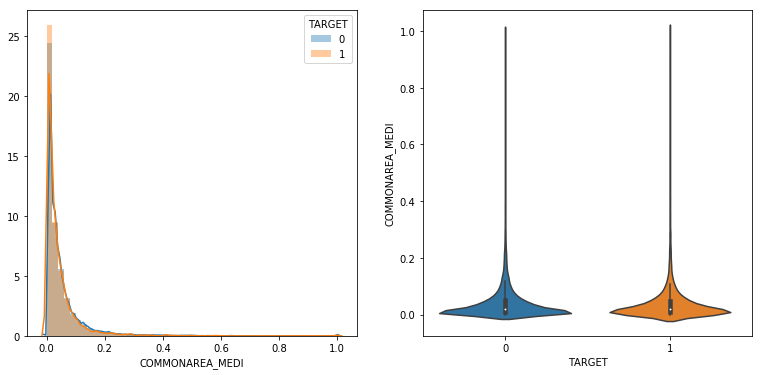

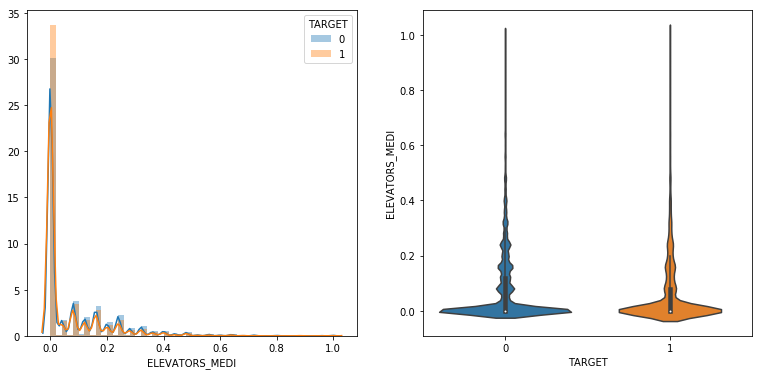

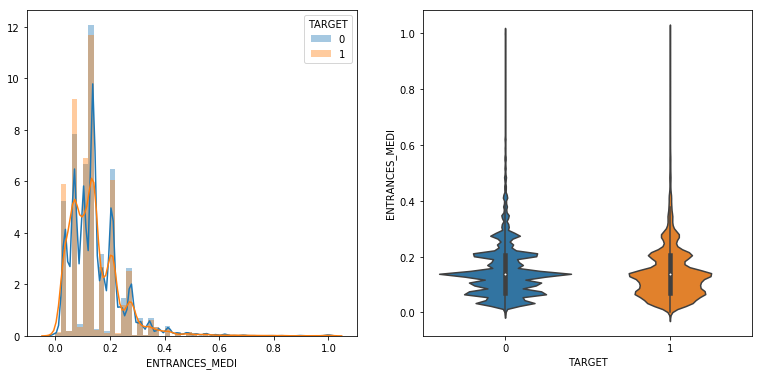

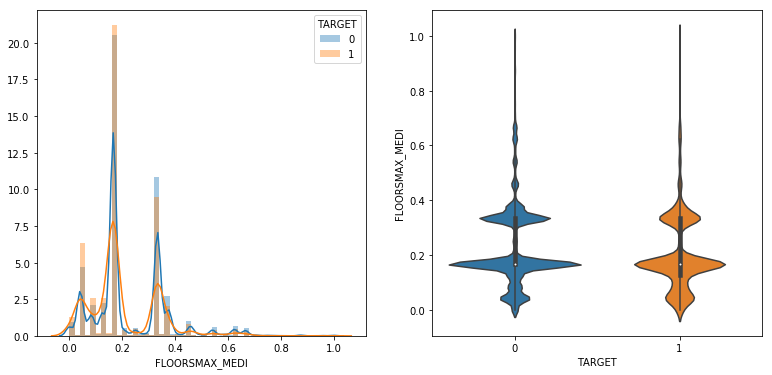

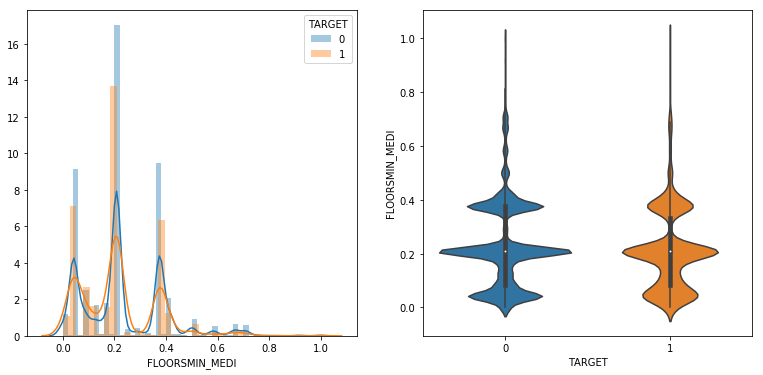

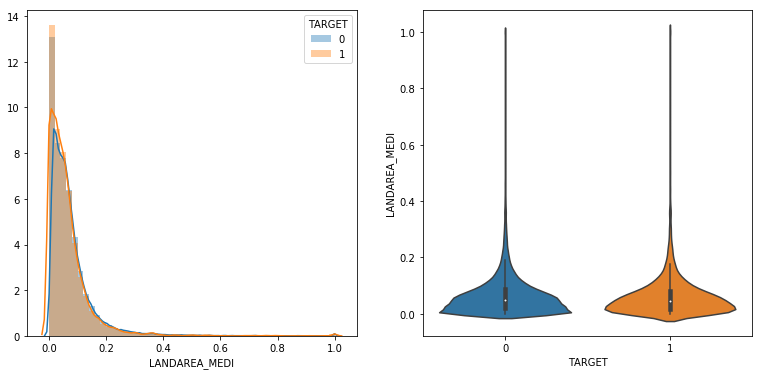

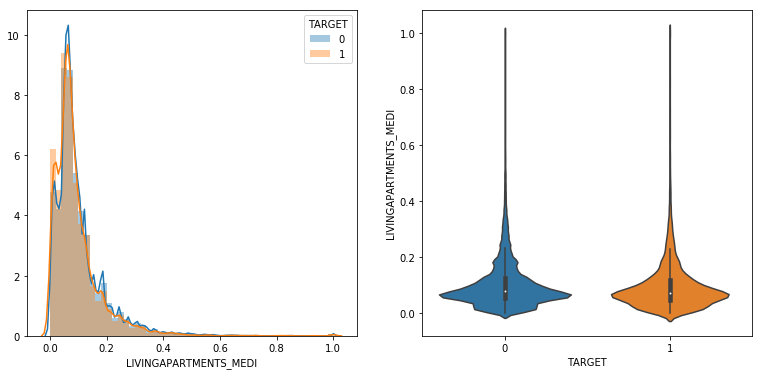

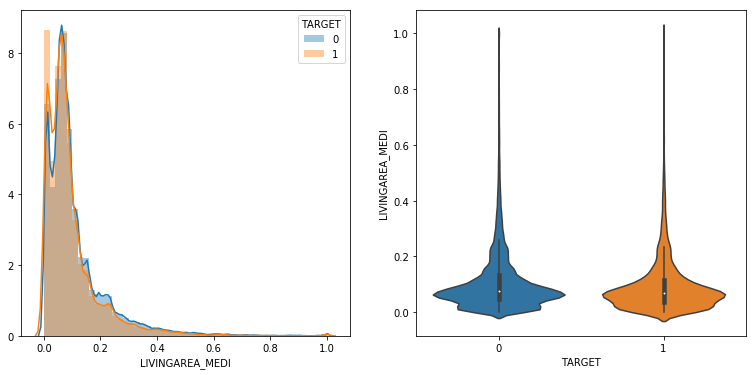

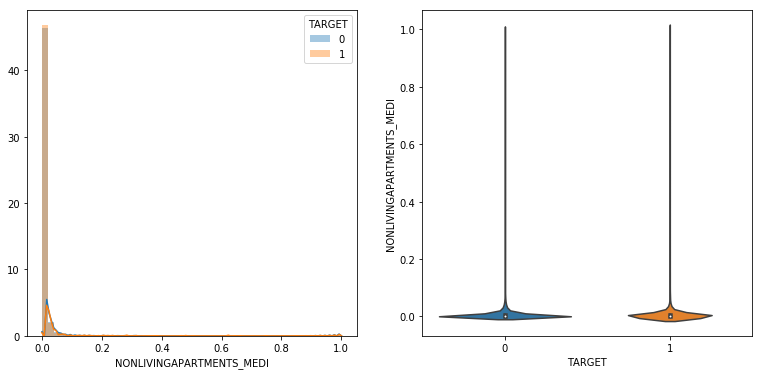

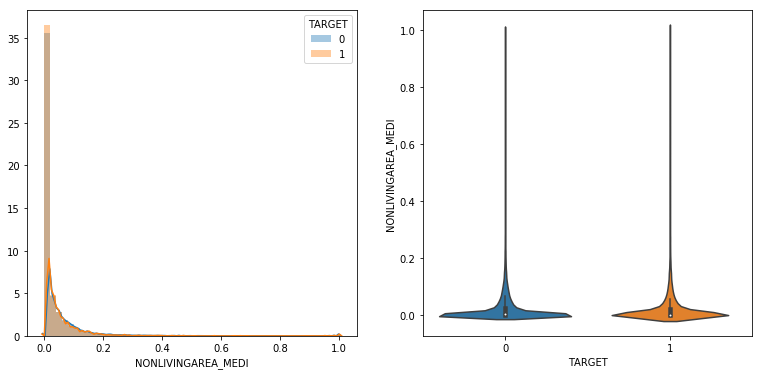

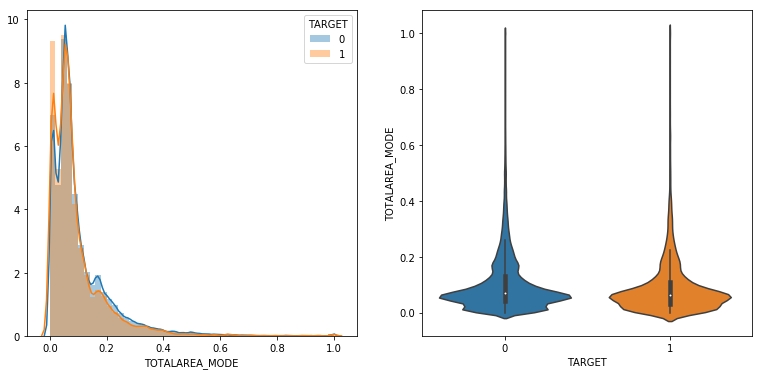

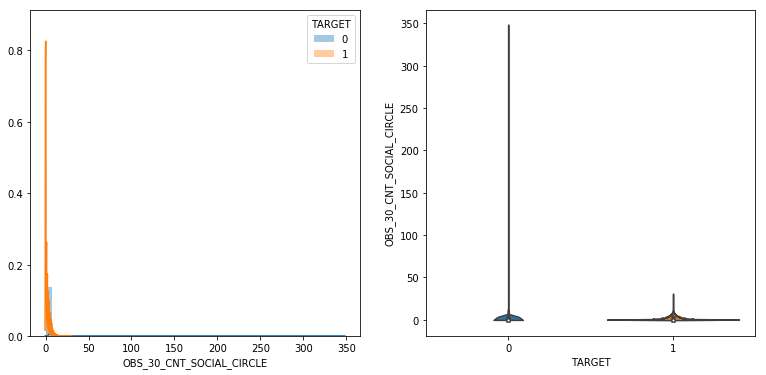

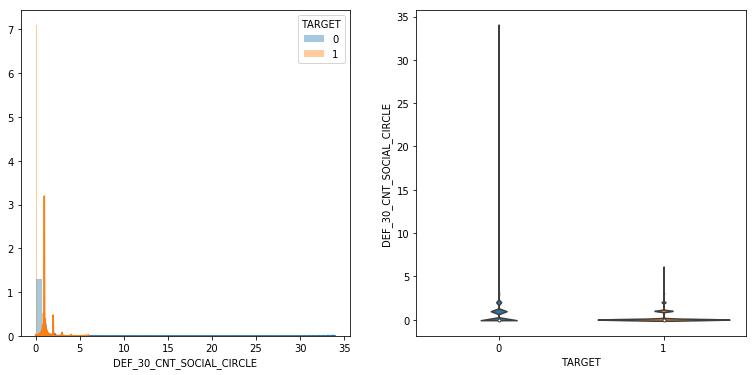

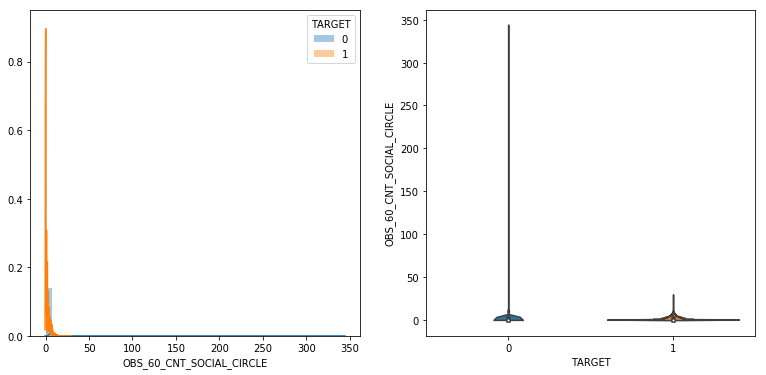

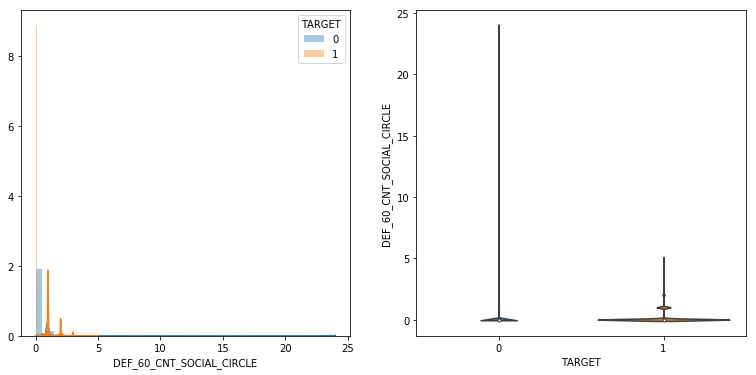

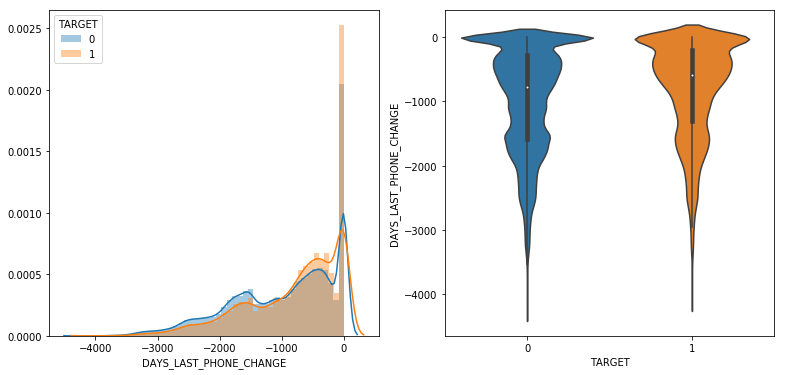

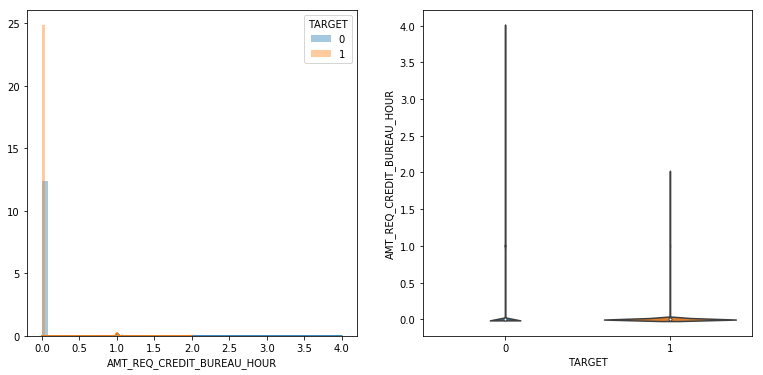

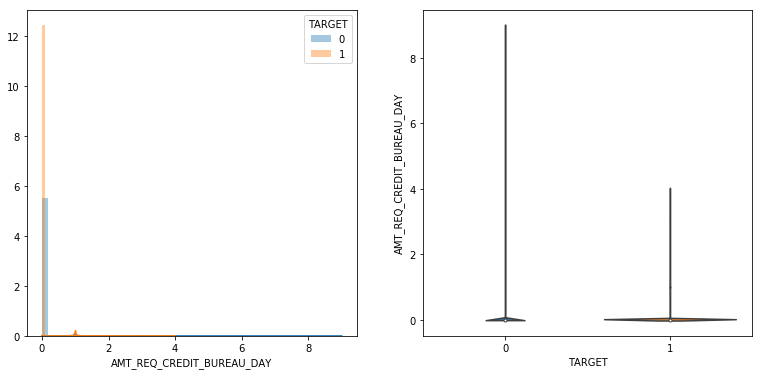

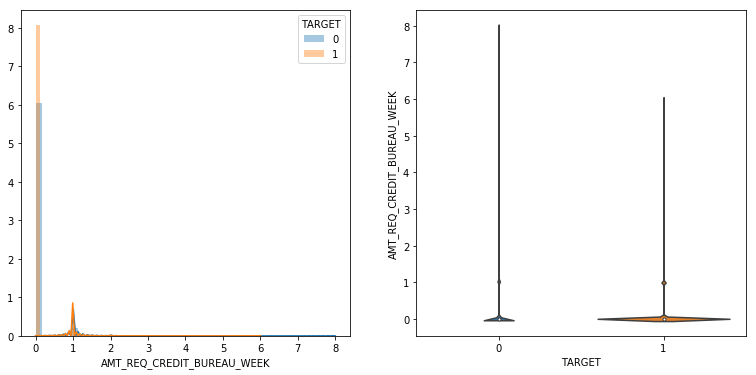

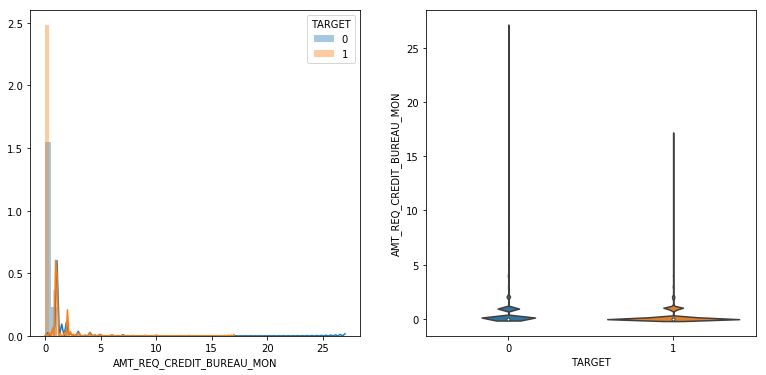

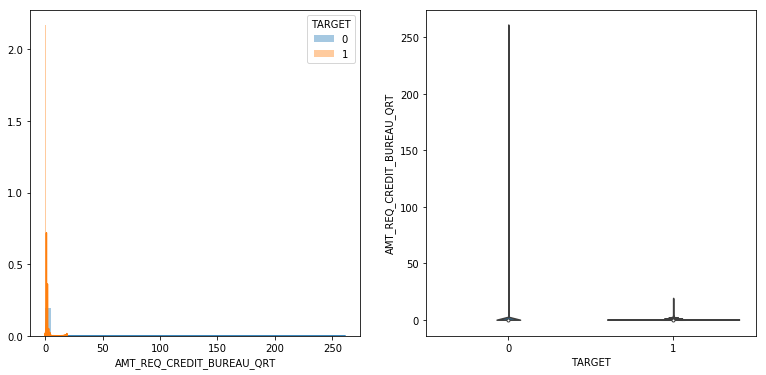

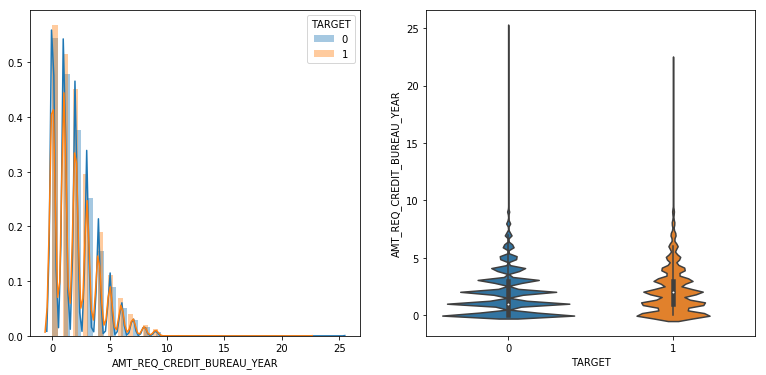

In [66]:
#float型の特徴量名の数だけdistplotとbiolinplotを表示
for i in df_float:
    dist_biolin(i)

float型について、TARGET0と1で分布が明確に異なっていたのは、EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3であった。データが外部データであり、どのようなことに基づいて算出されたデータか不明であるが、分類する際に重要な特徴量であると思われる。

#### ・ int型について目的変数との関係を見る。連続型の場合はヒストグラムとバイオリン図、離散型の場合は棒グラフと円グラフ。欠損値はとりあえず削除。

In [67]:
#int型の特徴量名
df_int = df.select_dtypes(include=[np.int64]).columns

#IDとTARGETを削除
df_int = df_int.delete([0, 1])

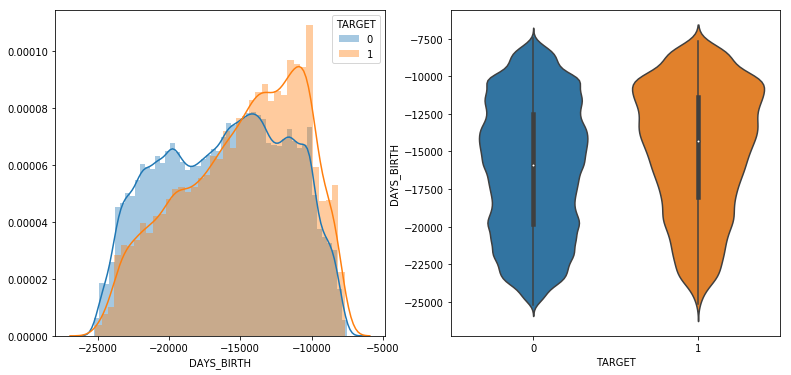

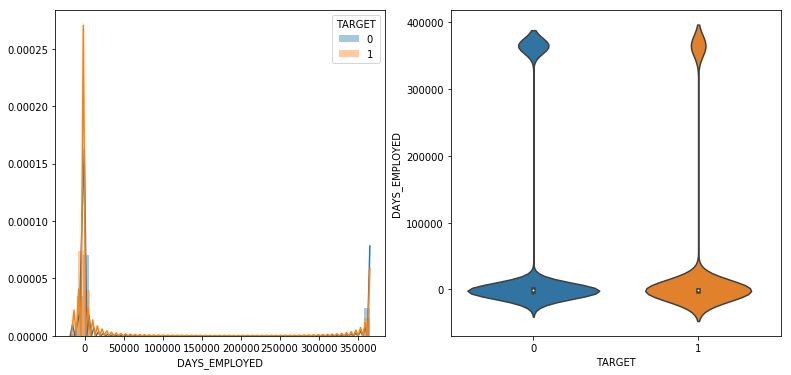

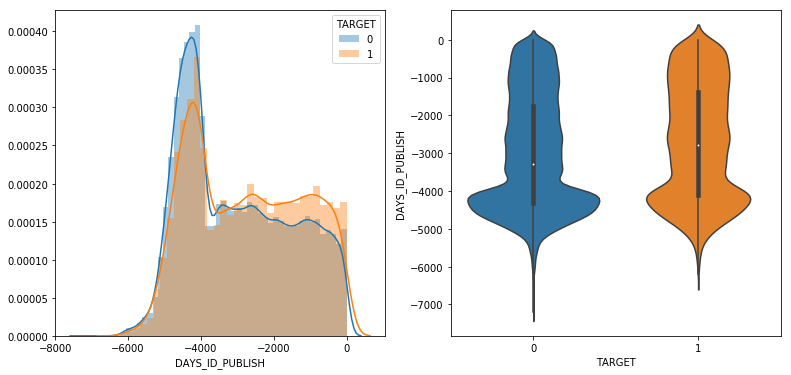

In [68]:
#int型、連続型の時
for i in df_int[1:4]:
    dist_biolin(i)

In [69]:
#DAYS_EMPLIOYEDがmaxの時の数
len(df[df['DAYS_EMPLOYED'] == df['DAYS_EMPLOYED'].max()]['DAYS_EMPLOYED'])

55374

In [70]:
#DAYS_EMPLIOYEDが0より多い時の数
len(df[df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'])

55374

DAYS_BIRTHは、 TARGETが0と1の場合で分布が異なっており、DAYS_ID_PUBLISHもわずかながらに分布が異なっていた。   
DAYS_EMPLIYEDに関して、分布が2極化していたことと、これがローン適用前に雇用された日を表しており、他の特徴量(DAYS_BIRTHなど)と比較すると基本的にはマイナスの値のみになると思われることから、DAYS_EMPLOYEDが最大の値の数と0より多い時の数を出力すると、どちらも55374となっていた。このことから、この値に何かしらの異常が疑われる。

In [71]:
#int型、離散型の特徴量
df_int_discrete = df_int.delete([1, 2, 3])
df_int_discrete

Index(['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


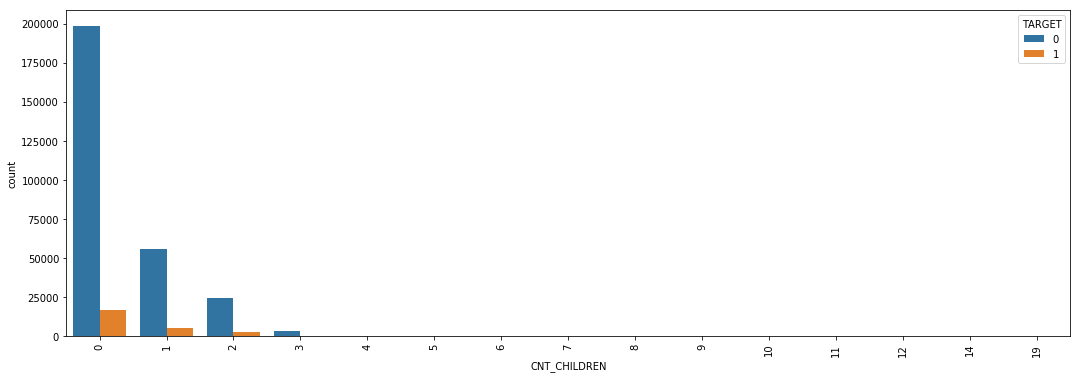

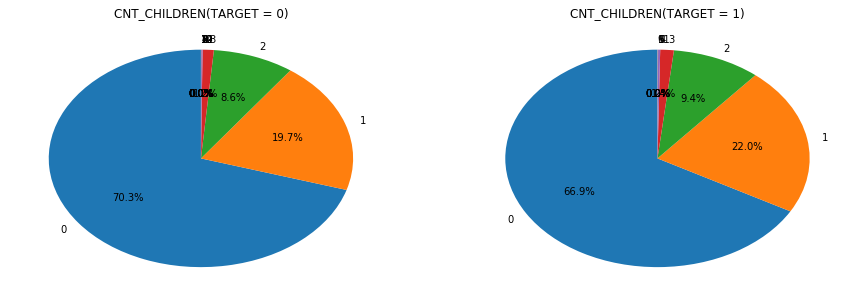



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


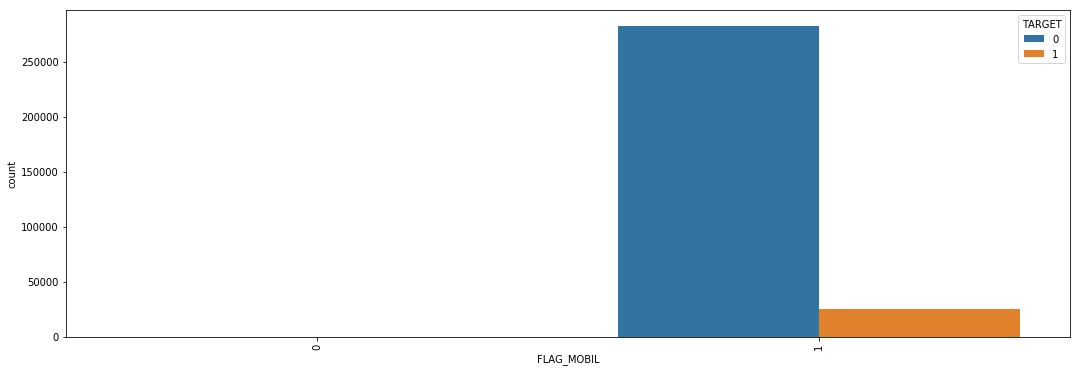

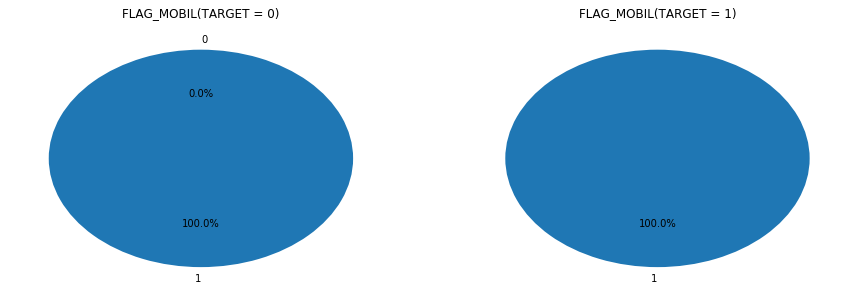



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


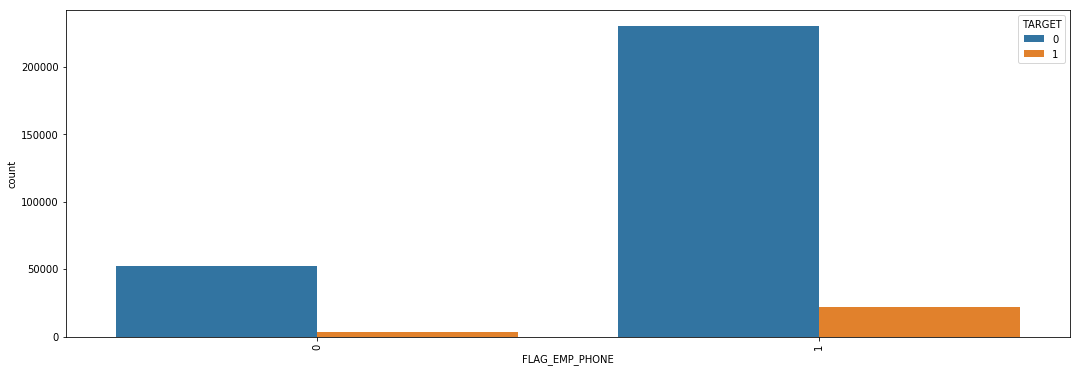

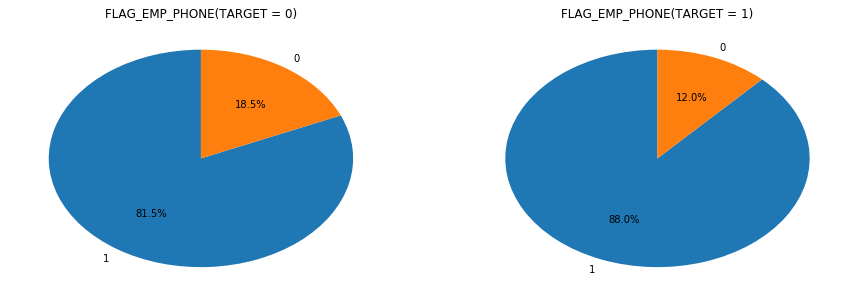



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


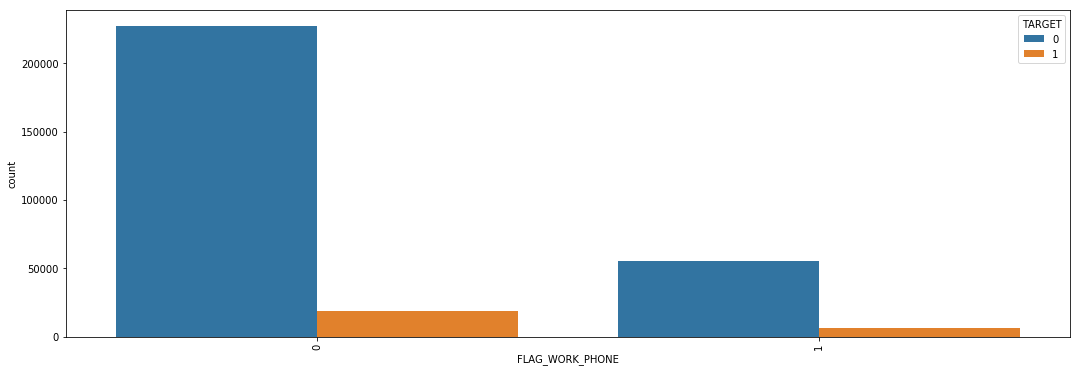

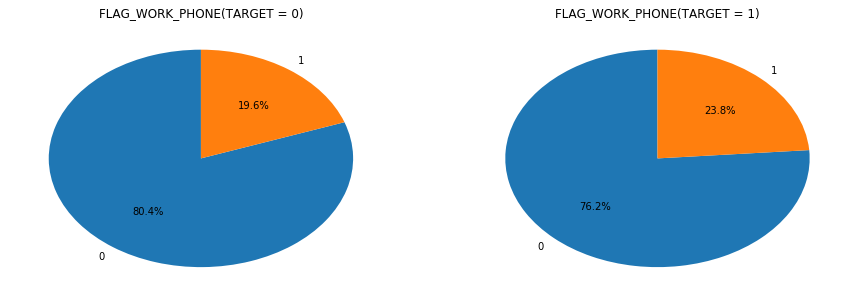



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


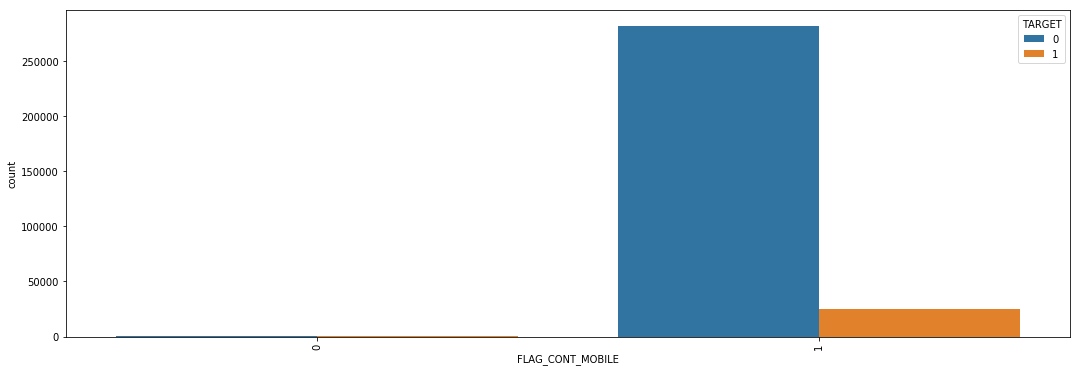

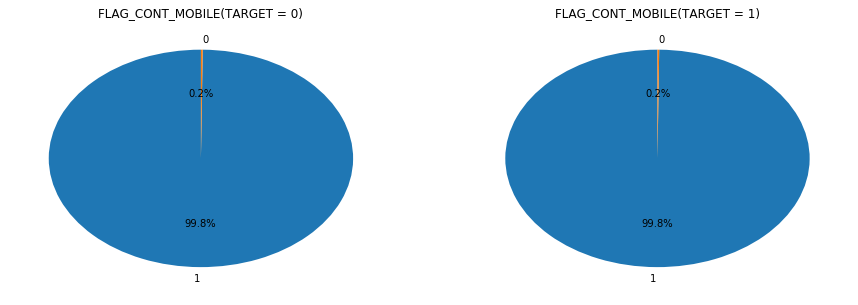



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


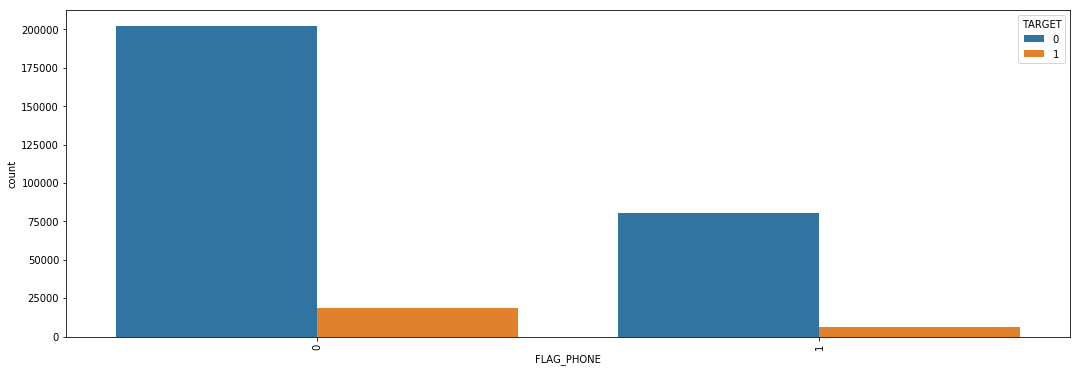

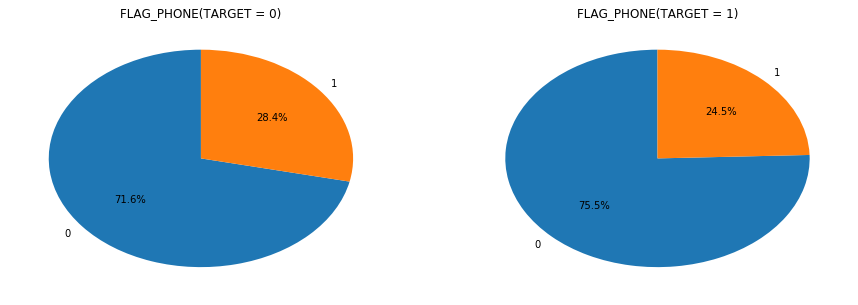



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


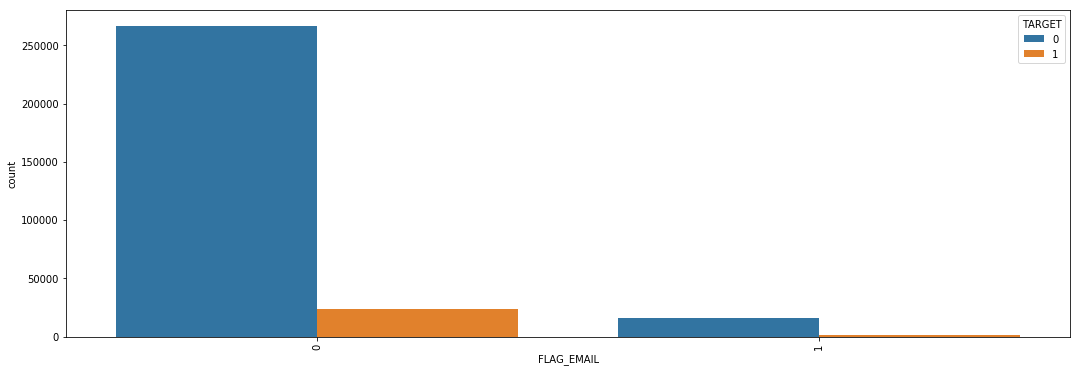

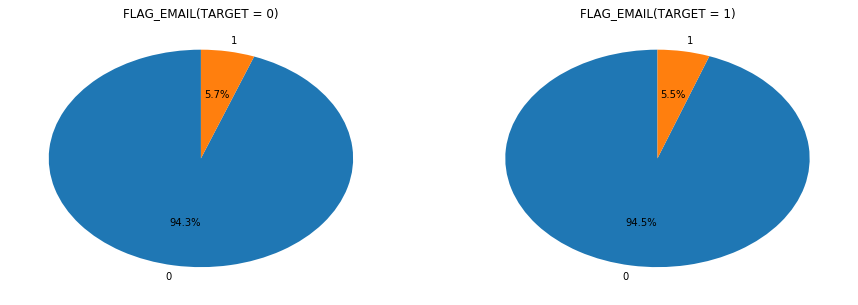



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


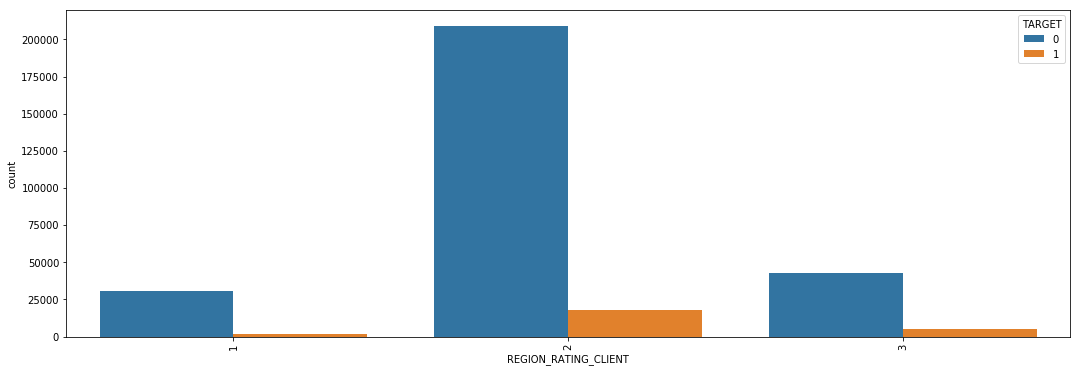

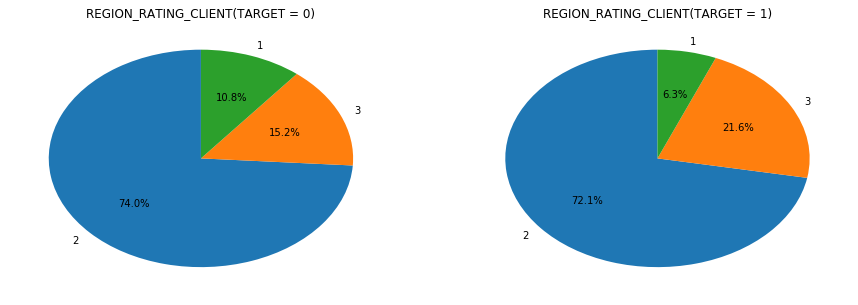



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


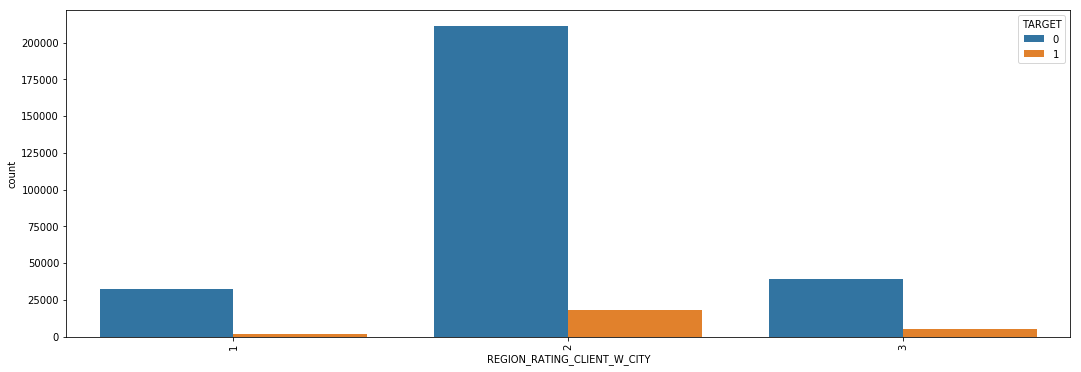

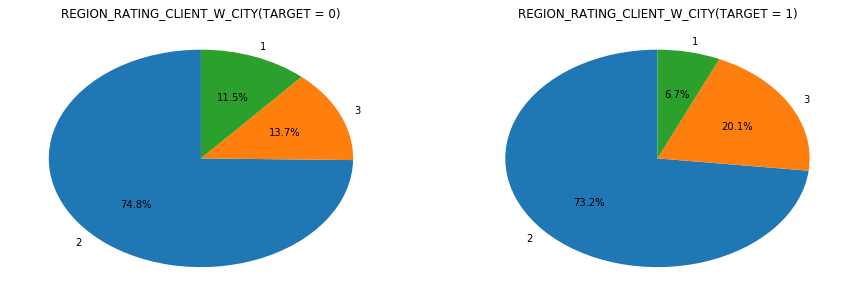



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


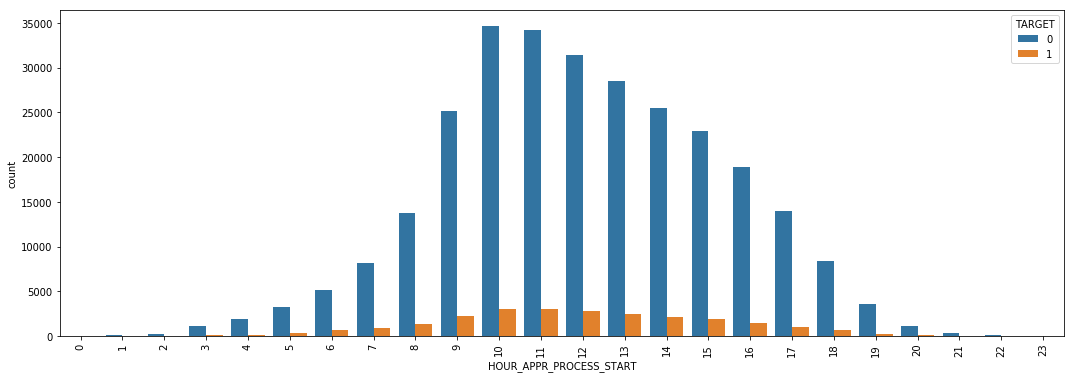

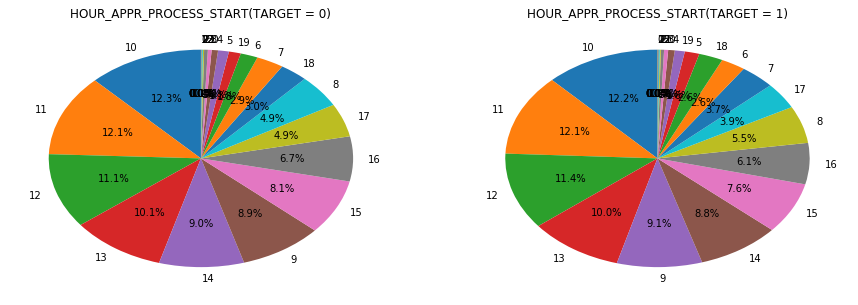



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


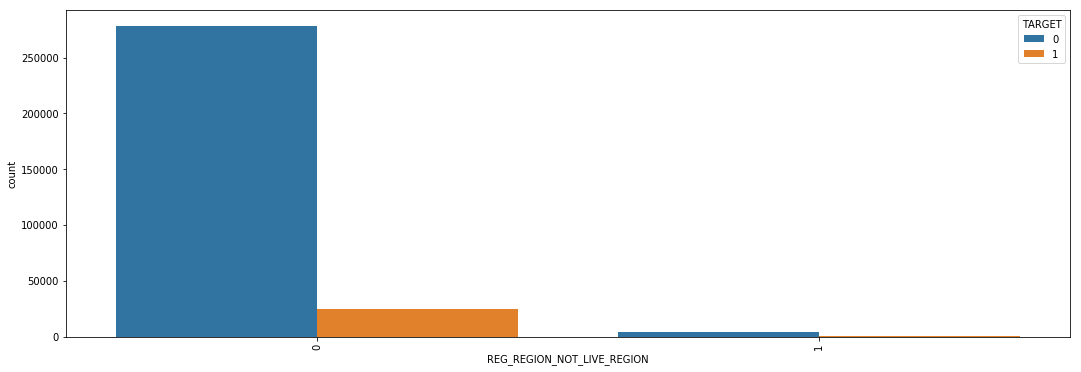

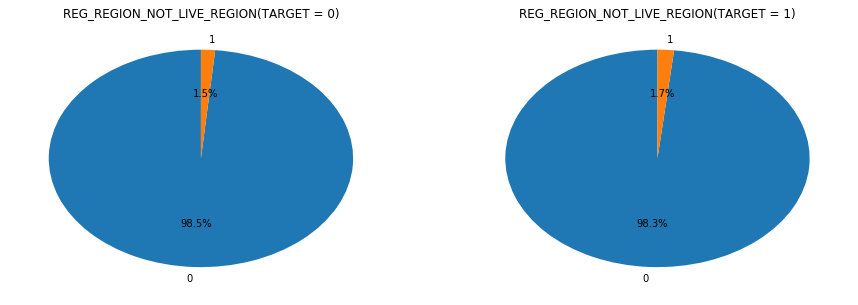



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


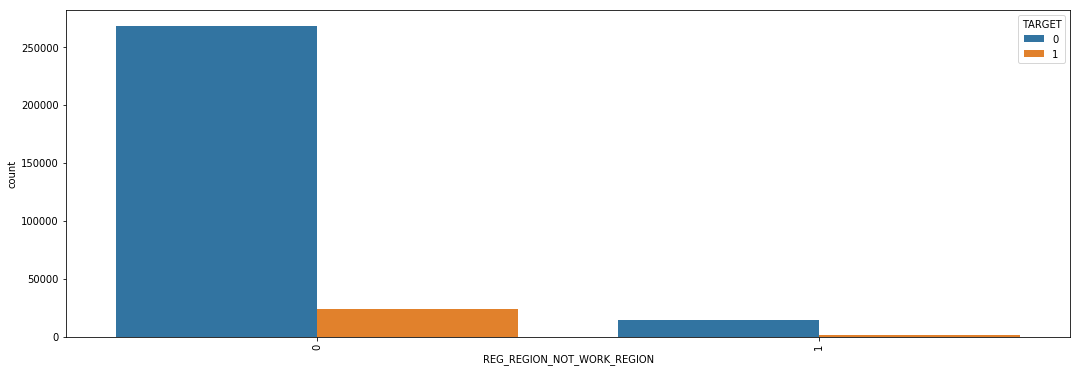

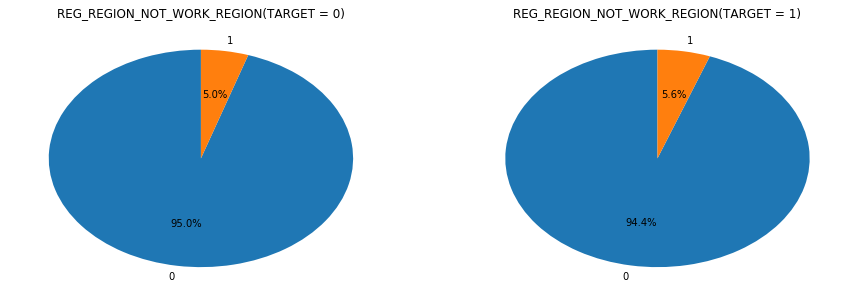



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


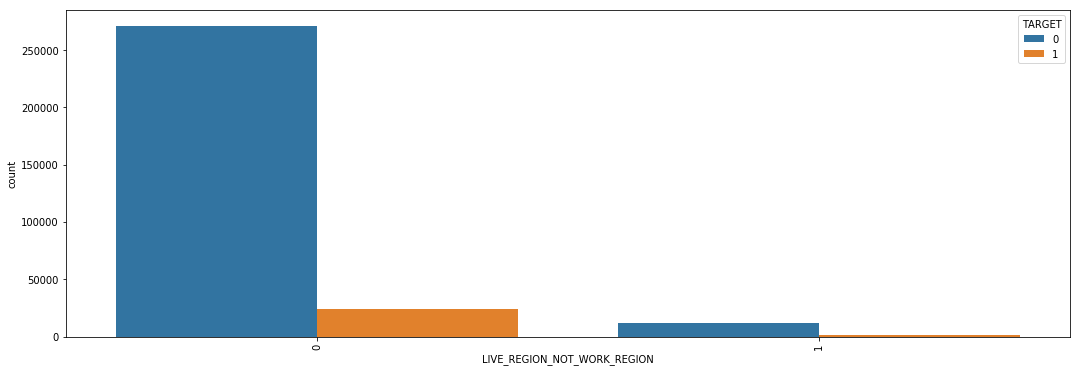

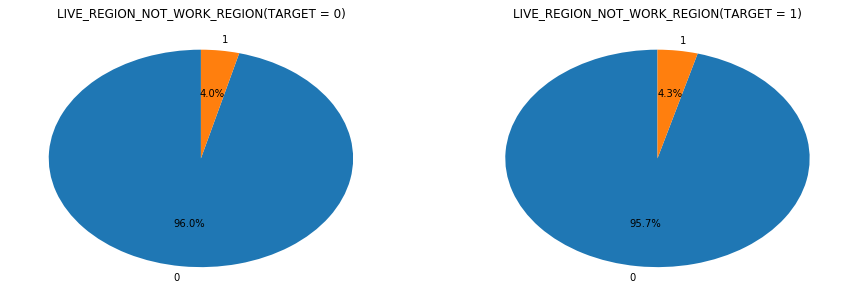



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


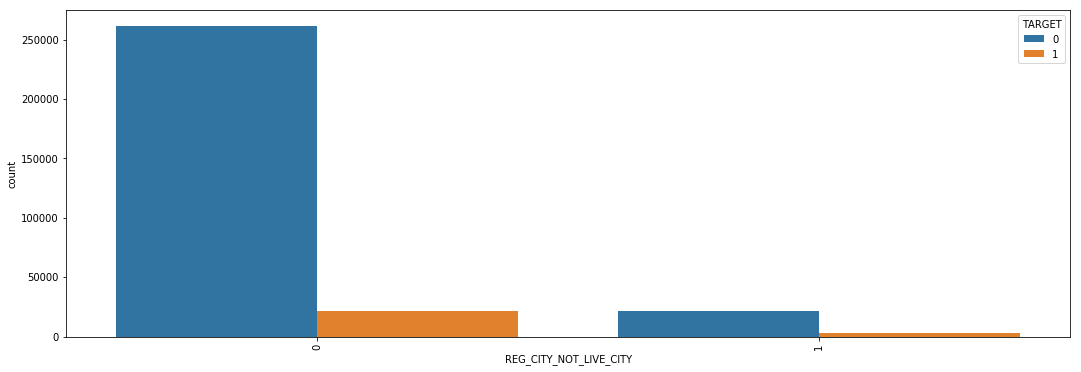

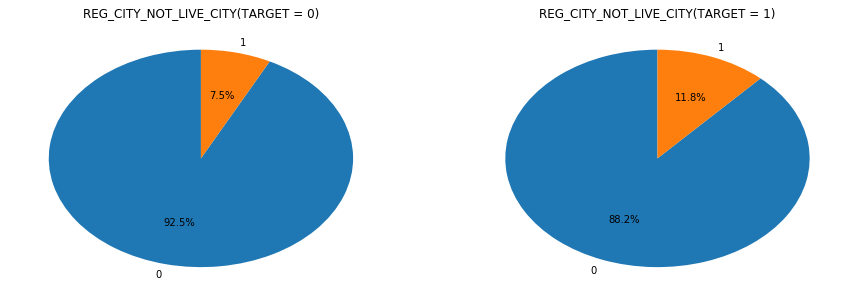



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


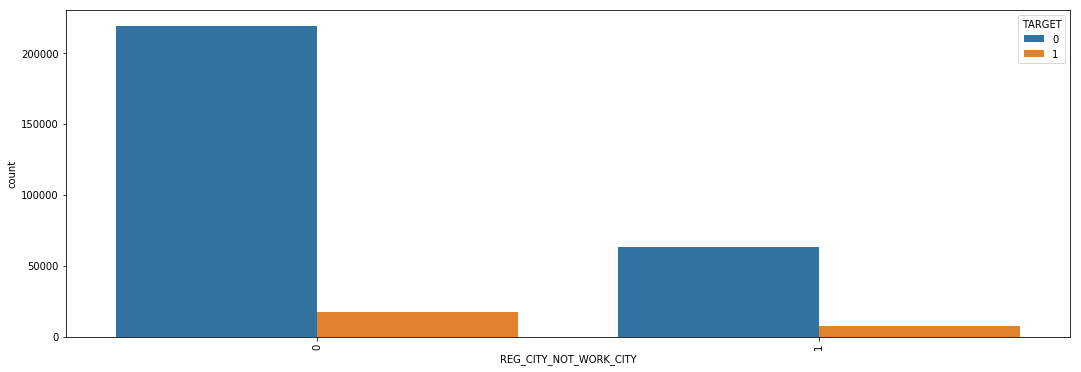

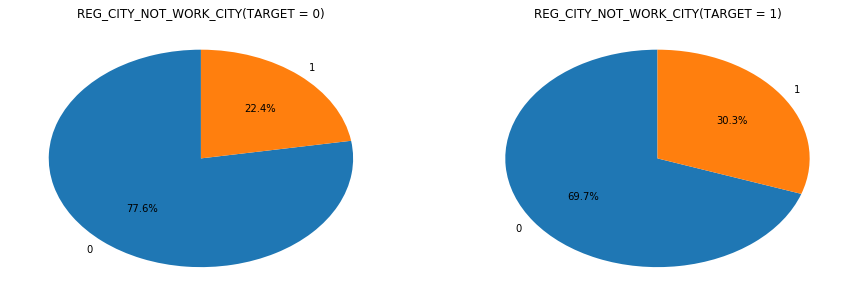



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


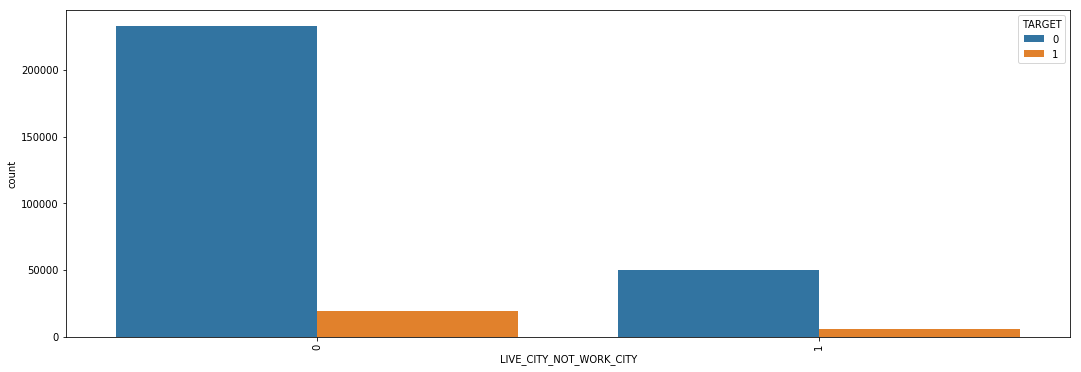

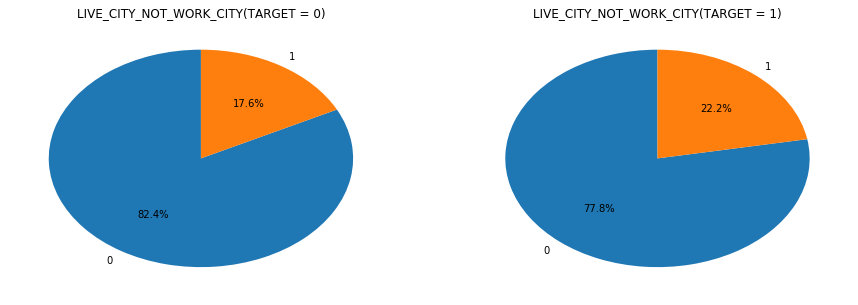



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


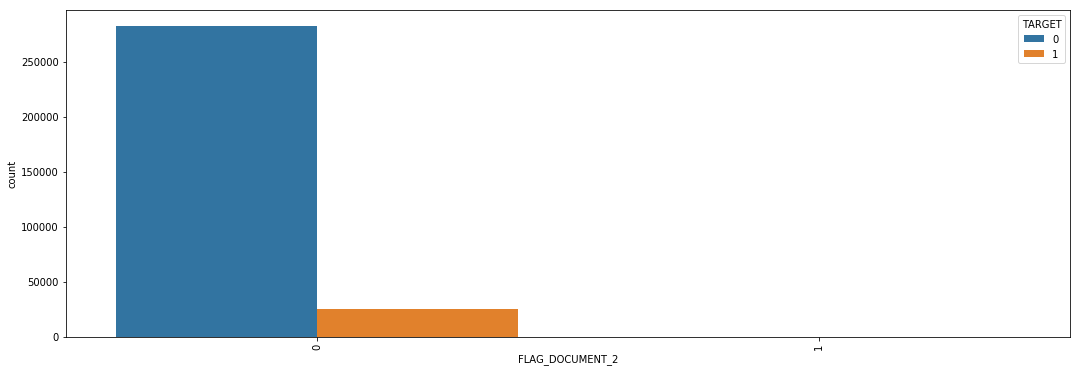

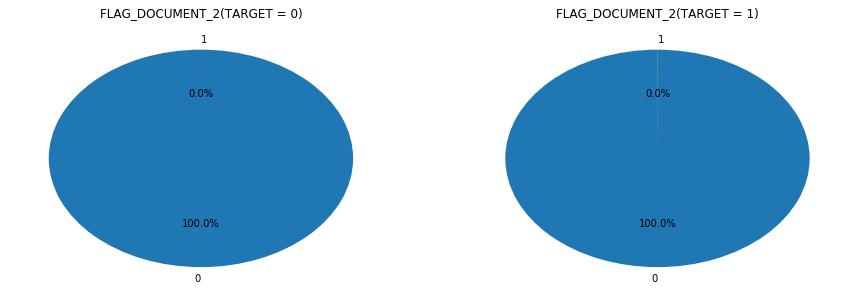



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


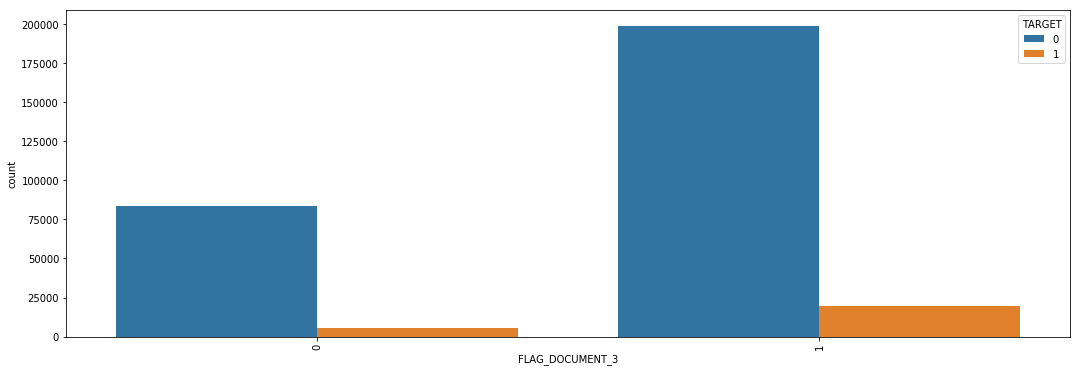

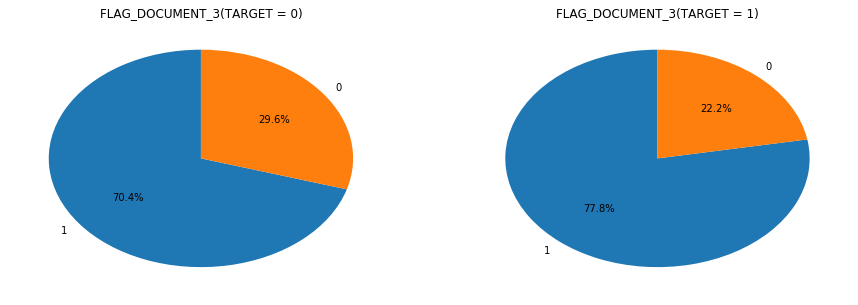



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


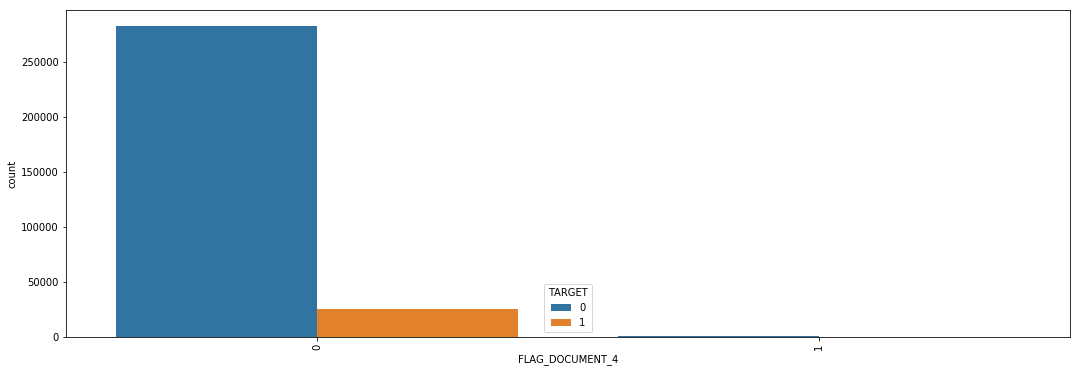

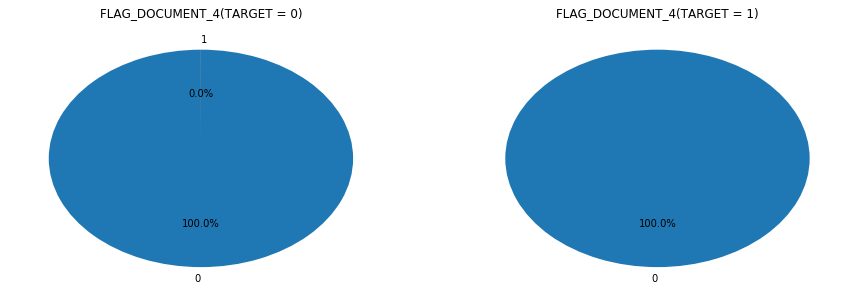



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


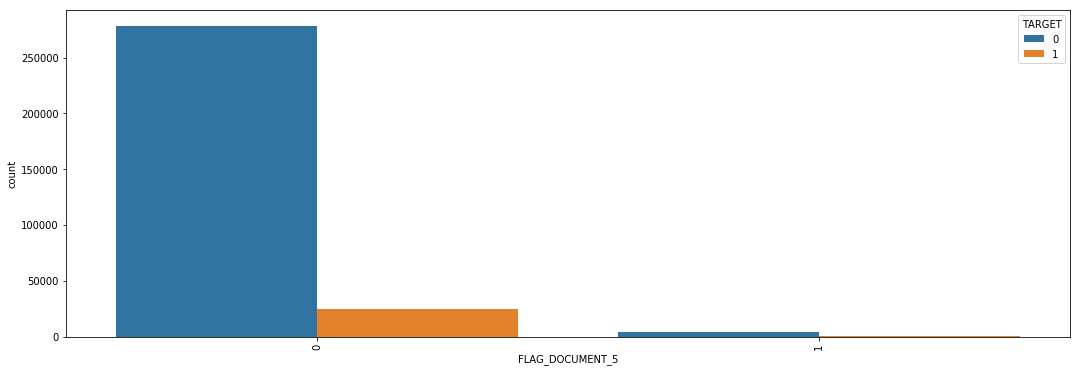

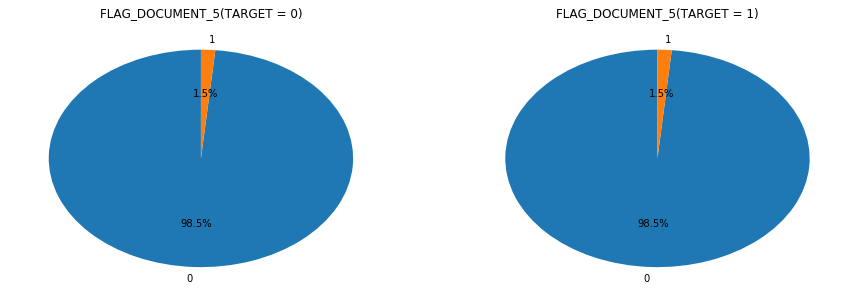



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


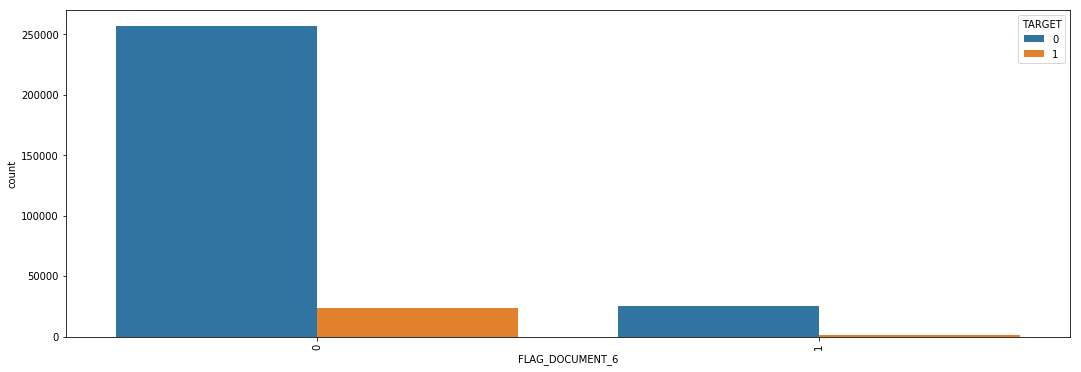

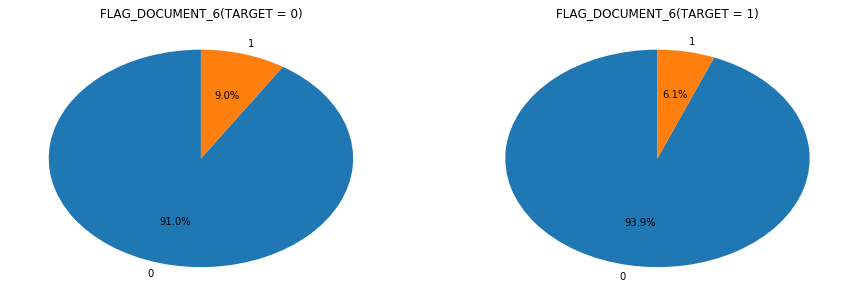



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


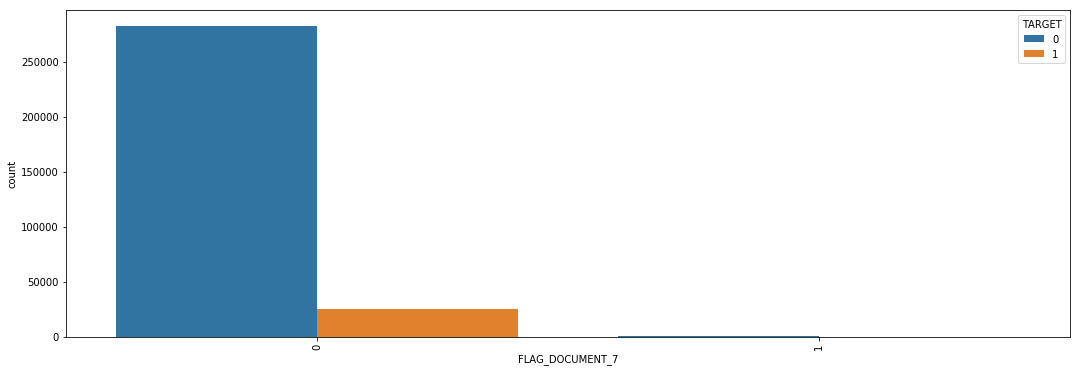

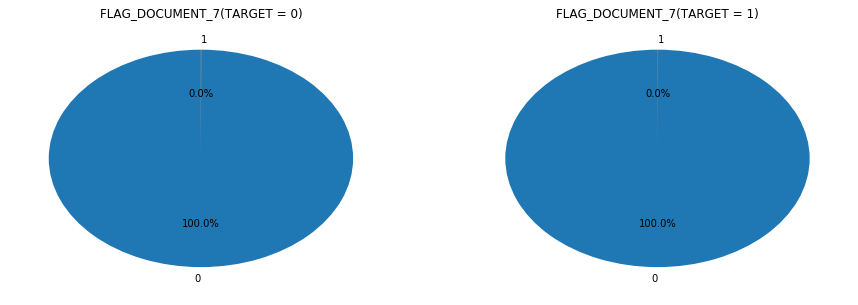



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


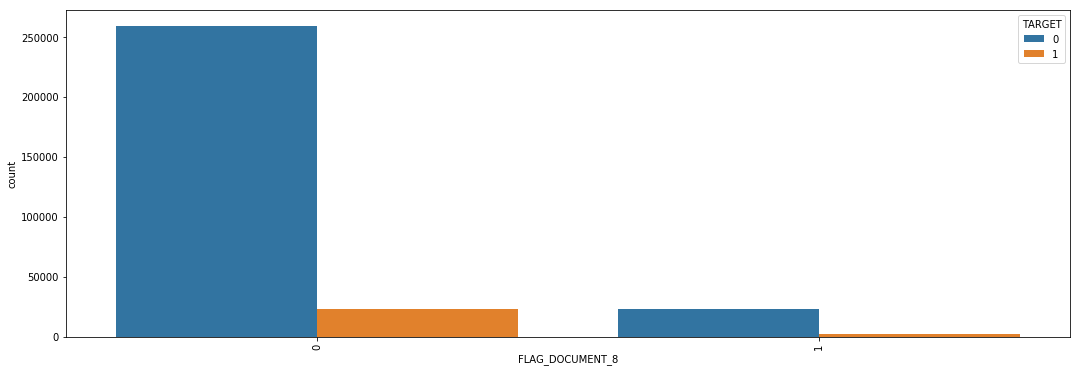

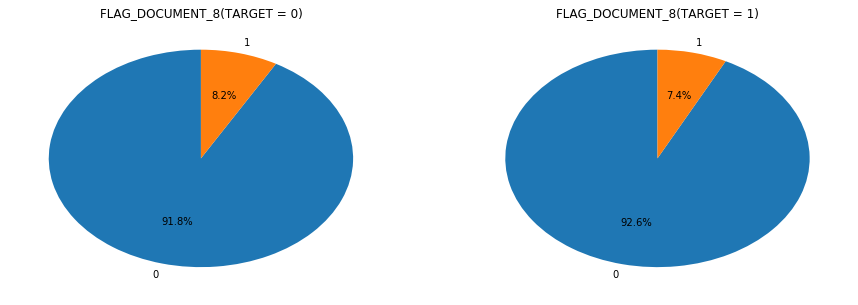



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


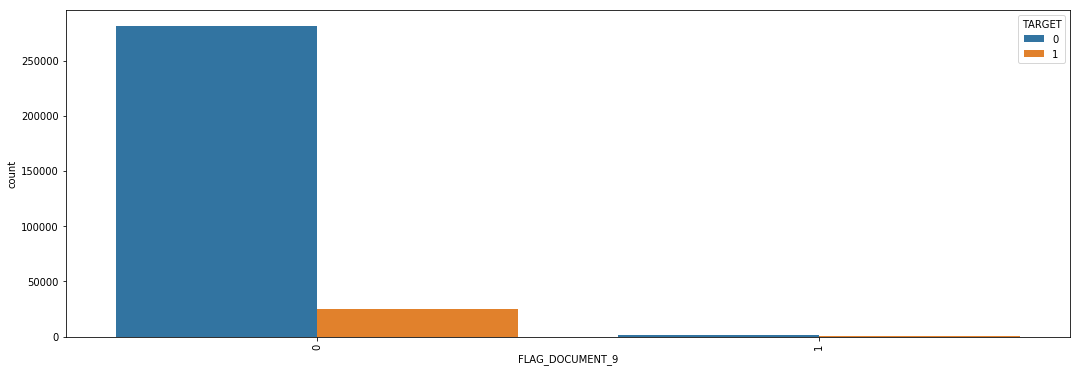

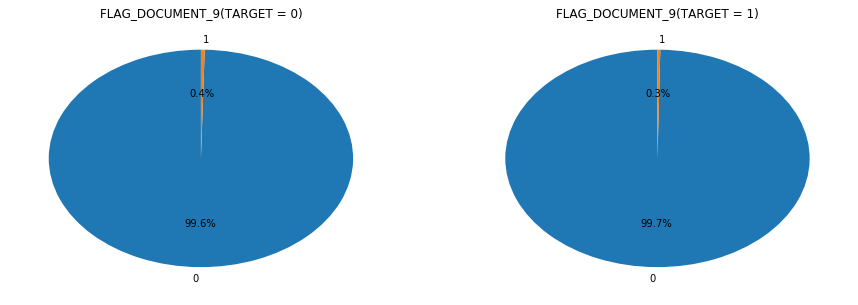



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


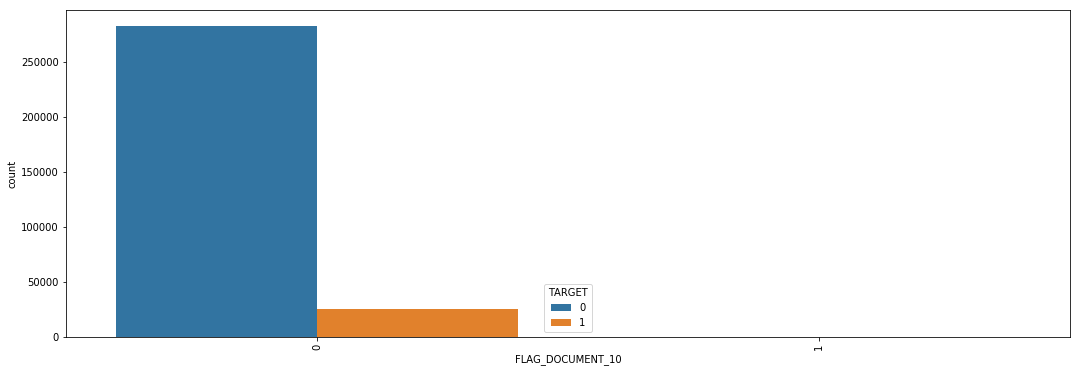

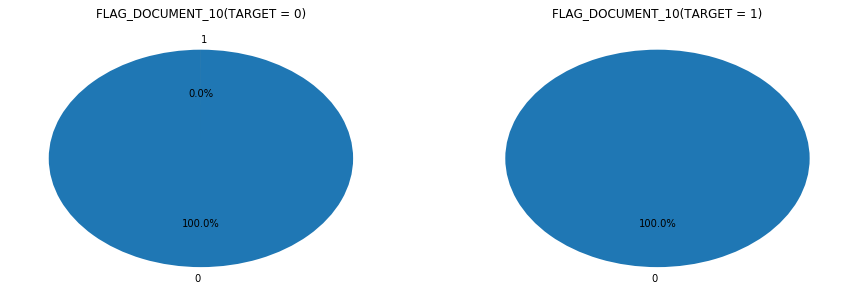



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


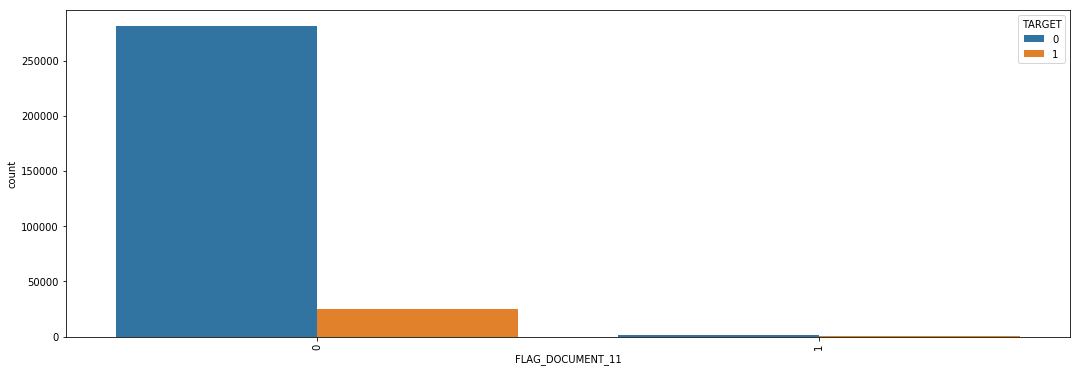

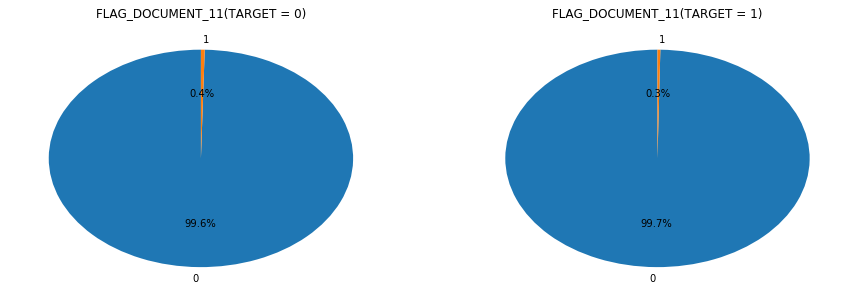



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


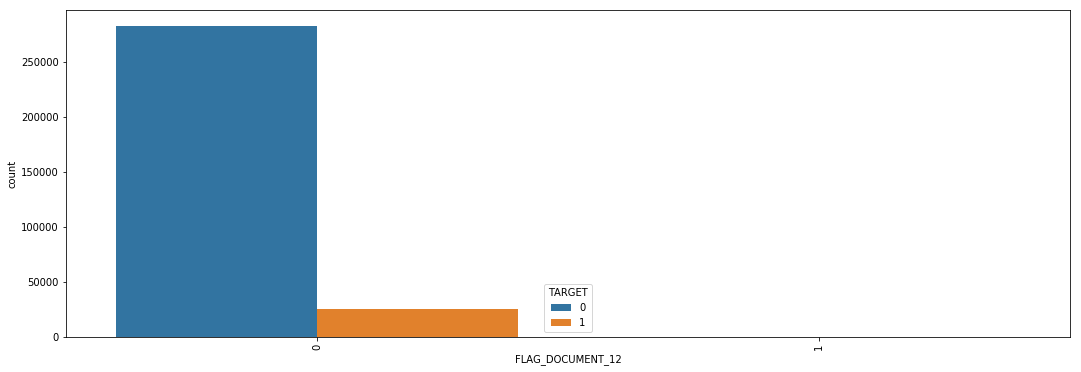

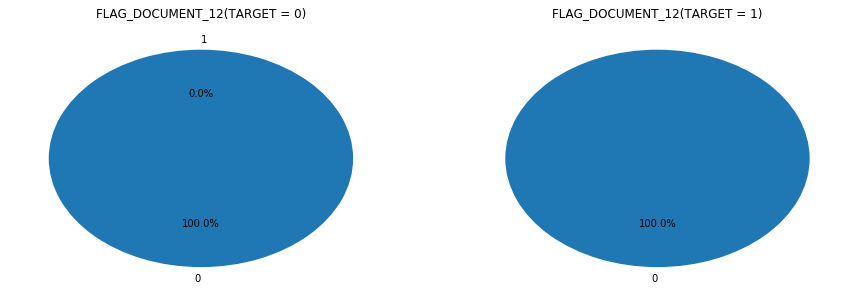



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


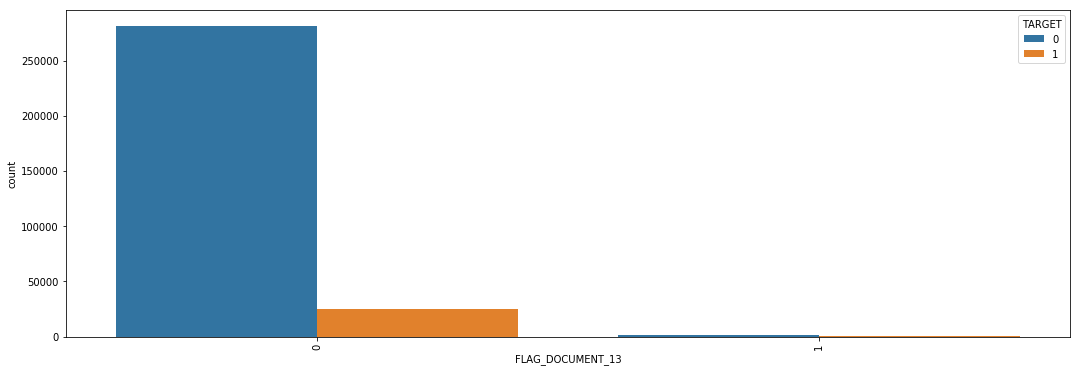

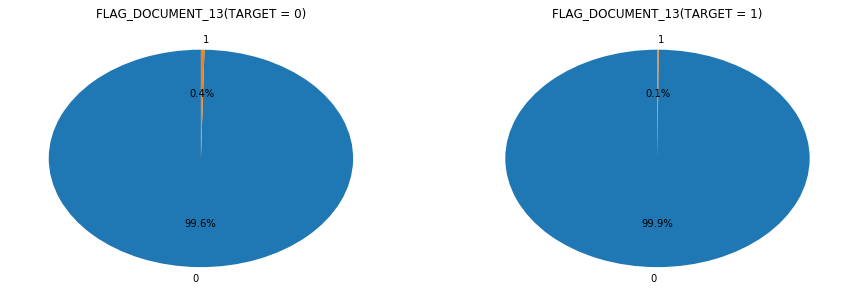



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


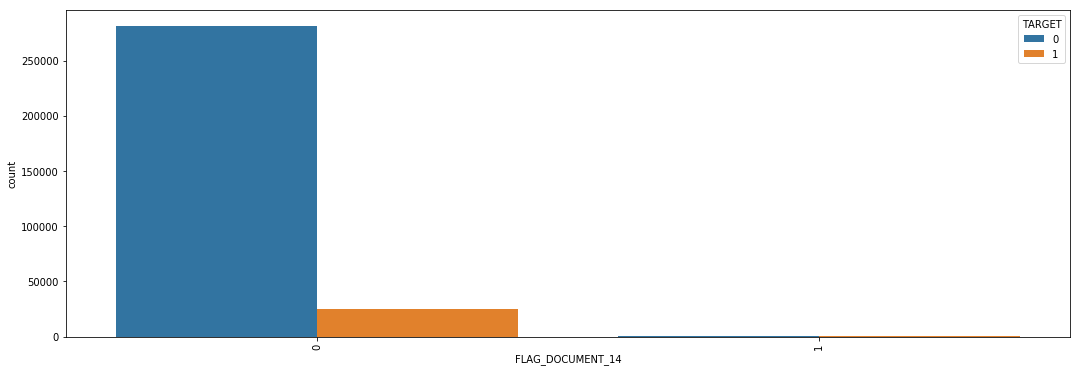

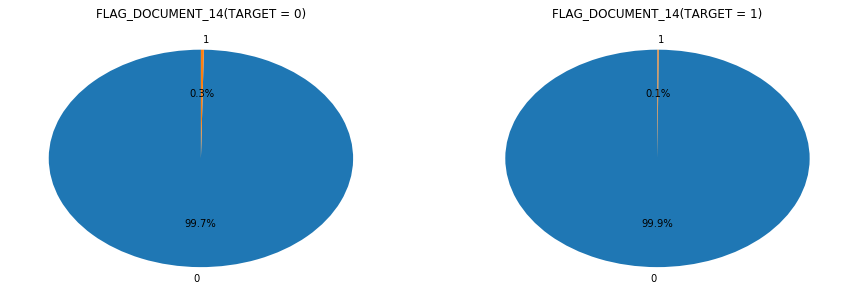



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


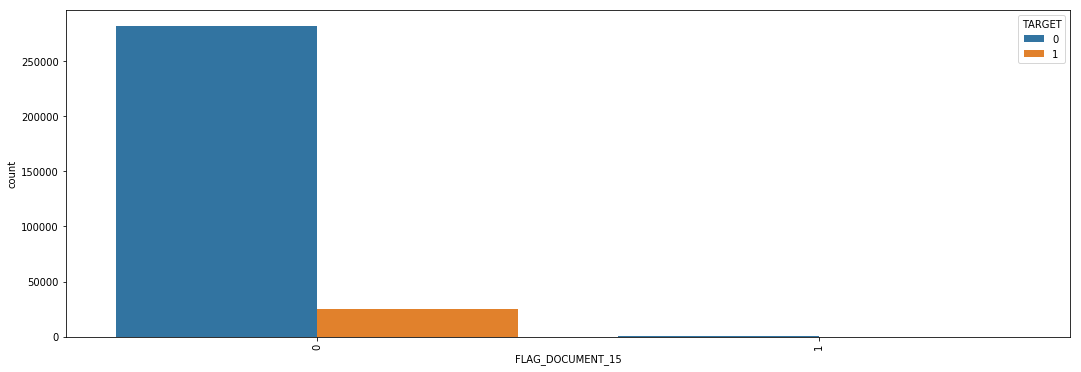

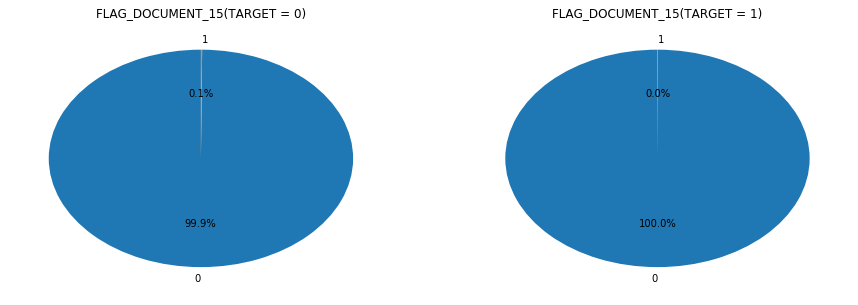



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


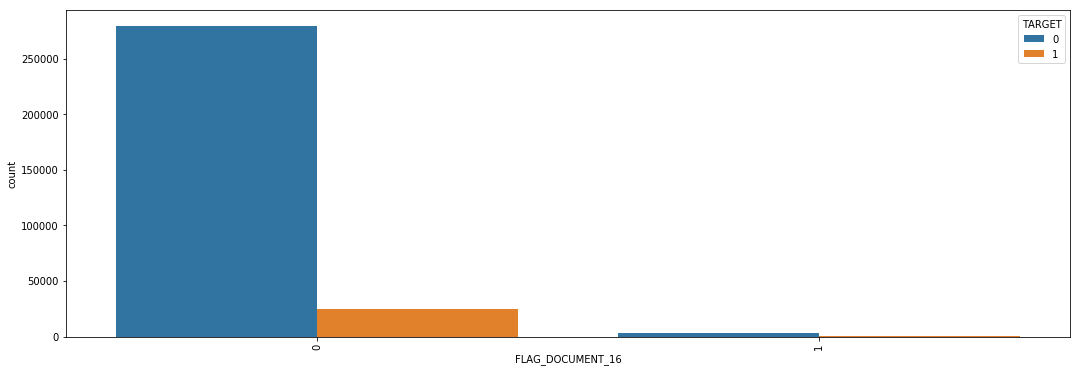

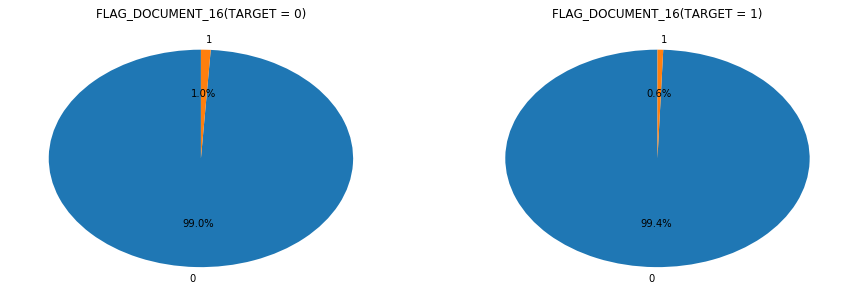



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


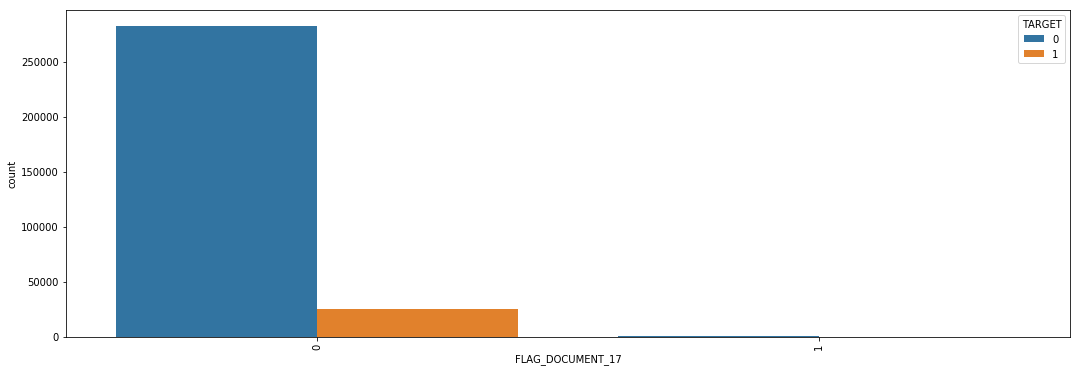

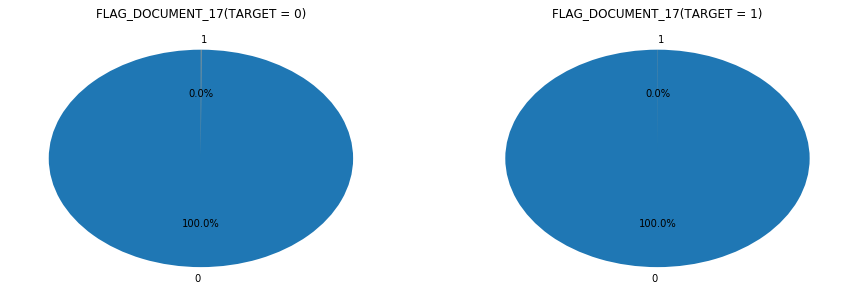



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


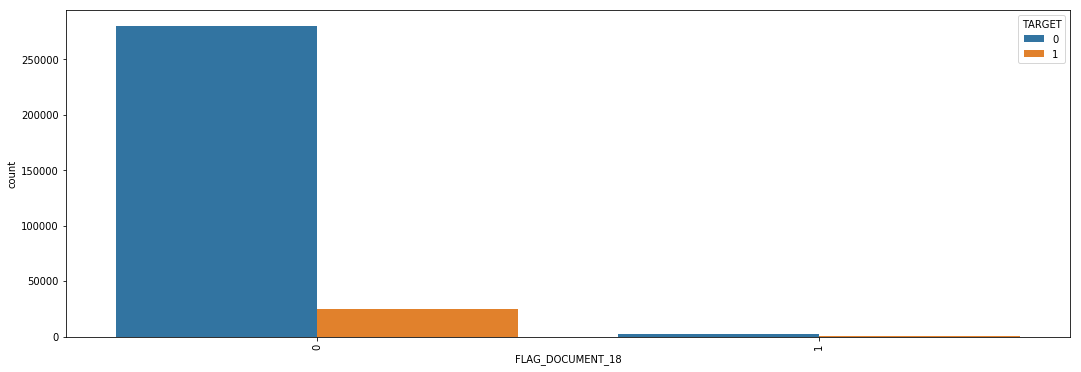

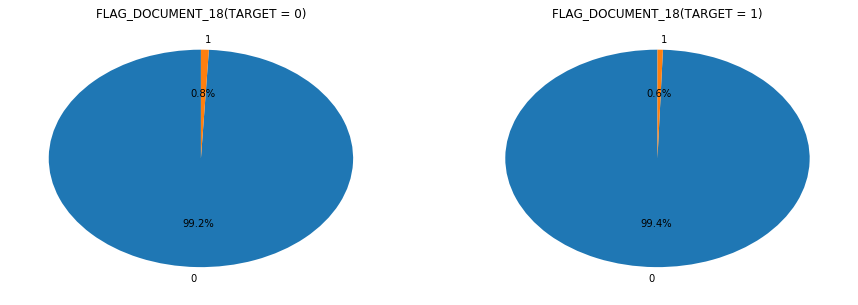



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


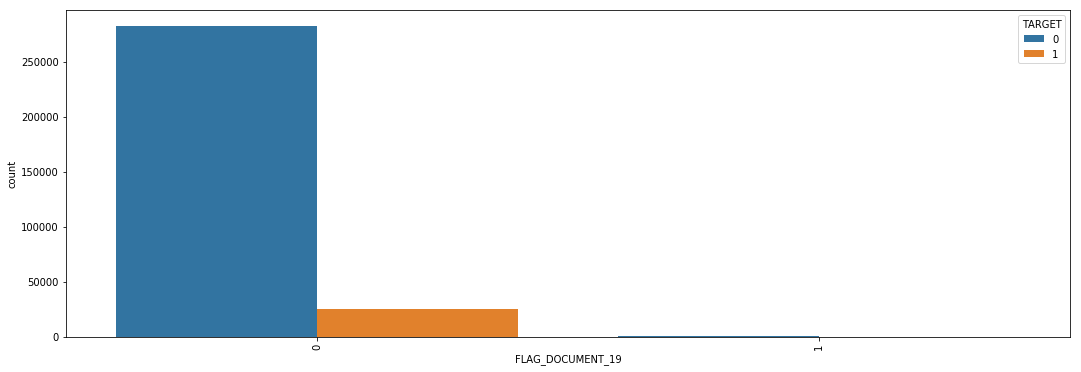

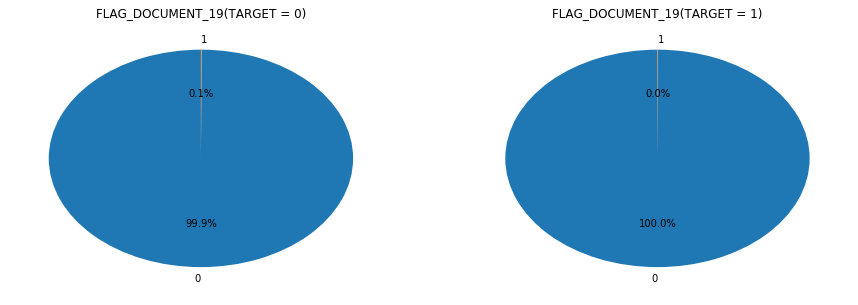



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


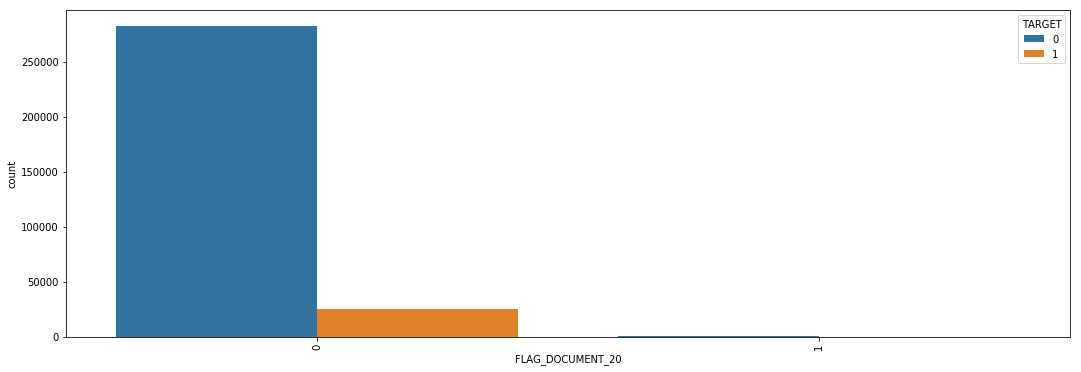

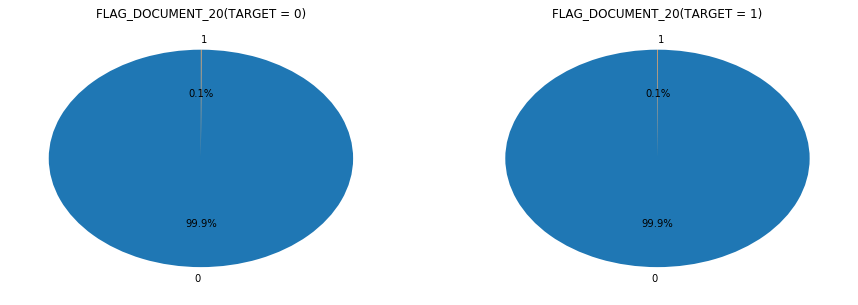



------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


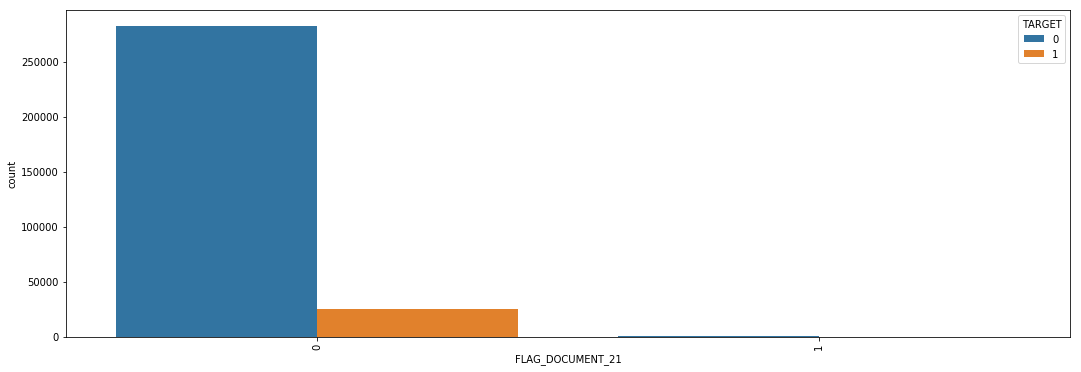

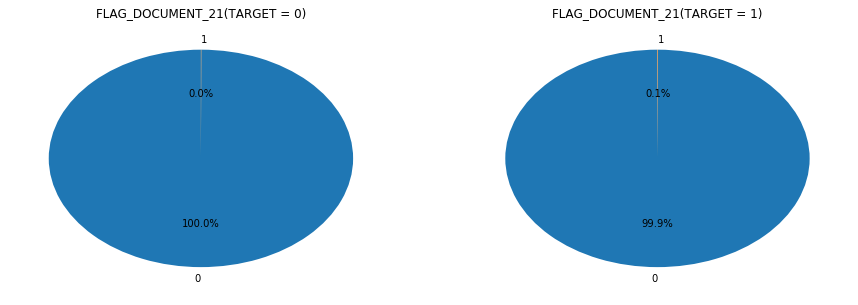

In [72]:
#int型、離散型の場合
for i in df_int_discrete:
    count_pie(i)

TARGETが0と1の場合に分け、各特徴量に含まれるユニーク値ごとに、総数と割合を可視化した。object型と同様に、総数ではどの特徴量でもTARGETごとで偏りが見られたが、割合はどちらもほぼ同じであった。

#### ・特徴量同士の関係性を、散布図行列で可視化する。選択したのは目視で分布が異なっていたEXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_ID_PUBLISHである。

In [73]:
#選択した特徴量
df_list = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH']

#欠損値を平均で埋める
df['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].mean(), inplace=True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(), inplace=True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace=True)

In [74]:
#相関係数を算出
df_corr = df[df_list].iloc[:, 1:].corr()
df_corr

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH  \
EXT_SOURCE_1         1.000000      0.135721      0.110606   -0.358525   
EXT_SOURCE_2         0.135721      1.000000      0.096653   -0.091885   
EXT_SOURCE_3         0.110606      0.096653      1.000000   -0.181252   
DAYS_BIRTH          -0.358525     -0.091885     -0.181252    1.000000   
DAYS_ID_PUBLISH     -0.088240     -0.050901     -0.116270    0.272691   

                 DAYS_ID_PUBLISH  
EXT_SOURCE_1           -0.088240  
EXT_SOURCE_2           -0.050901  
EXT_SOURCE_3           -0.116270  
DAYS_BIRTH              0.272691  
DAYS_ID_PUBLISH         1.000000

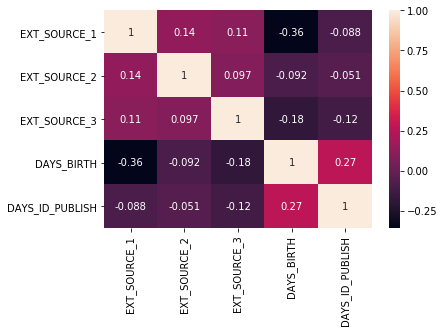

In [75]:
#ヒートマップを算出
sns.heatmap(df_corr, annot=True);

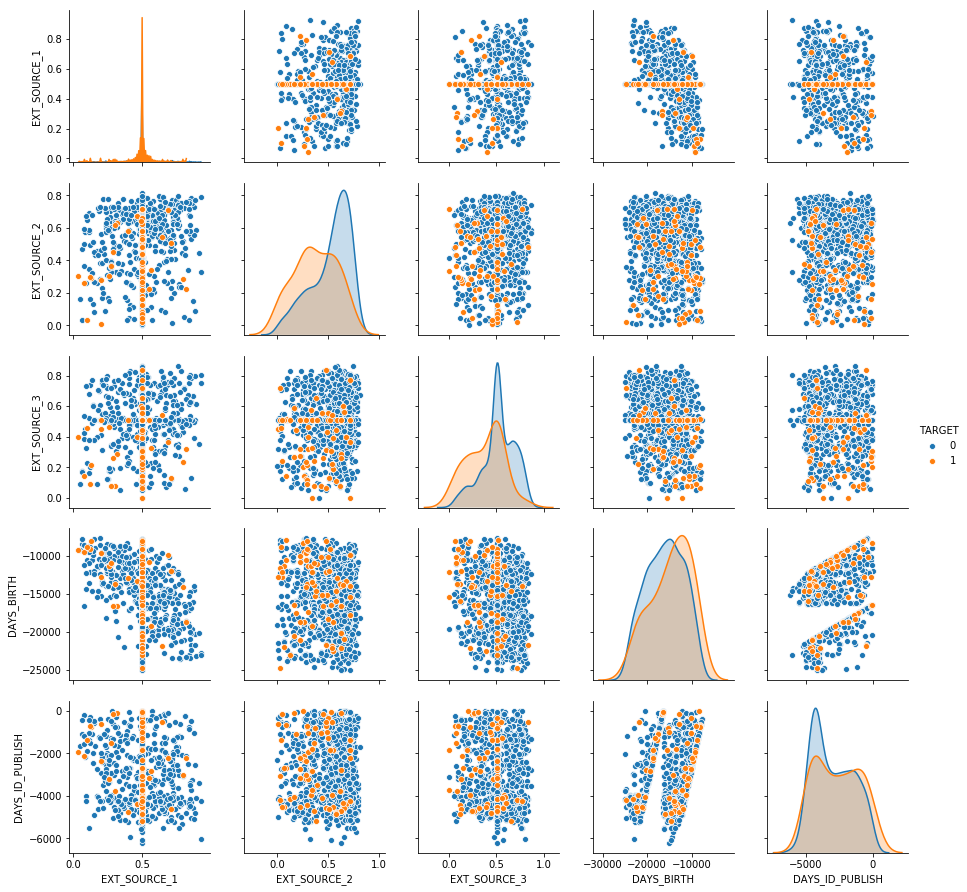

In [76]:
#散布図行列を出力(行数が多いので、1~1000行を抽出)
sns.pairplot(df[df_list][:1000], vars=df_list[1:], hue='TARGET');

選択した特徴量同士では目立った相関関係は見られなかった。